# 오늘 우리는 

* **Data report를 작성하는 방법을 배울 거에요.**

* **데이터 시각화에 대해서 배울 거에요.**

* **텍스트 데이터 처리하는 법을 배울 거에요.** 

# 까이지 않는 데이터리포트

![](https://online-behavior.com/sites/default/files/inline-images/data-studio-seo.jpg)

# 1. 데이터의 출처를 밝혀라!

**데이터 분석은 근복적으로 데이터 위에서 하는 것, 데이터가 믿을 만 하지 못하면 그 분석 또한 의미가 없어진다.**

![](https://memegenerator.net/img/instances/63160485/so-youre-telling-me-the-dataset-is-valid.jpg)

**꼭 !!! 데이터를 얻은 경위, 혹은 수집한 장소와 방법을 명시해야한다.**

**(한국)믿을 만한 데이터 소스**

 - http://kostat.go.kr/portal/korea/index.action
 - https://dacon.io/

**그런 의미에서 오늘 사용할 데이터는 !**

## Youtube API 에서 추출한 데이터셋 

- https://developers.google.com/youtube/v3/?hl=ko

![](https://www.gyanblog.com/assets/img/2018/05/xYoutubeDataApiV3.png.pagespeed.ic.OYLMUymKAz.png)

In [1]:
import pandas as pd

df = pd.read_csv("KR_youtube.csv")
df.sample(3)

video_id trending_date  \
19681  hkrYstM_msg      18.19.03   
2479   F7UQvcShPpU      17.28.11   
11461  8Ib-OKZYJBs      18.26.01   

                                                   title       channel_title  \
19681  전희경, 5월에 집집마다 세금 폭탄 터진다!! 문재인 그때는 촛불 타령 하며 국민에...             pirater   
2479                       조선일보 동아일보가 이제야 알아차렸다.20171124  KSK한성주장군/윤PD 계선국TV   
11461  ON THE SPOT: 3rd Annual Commemoration of HWPL ...                 PTV   

       category_id              publish_time  \
19681           22  2018-03-16T09:09:26.000Z   
2479            24  2017-11-26T01:11:26.000Z   
11461           25  2018-01-25T00:12:38.000Z   

                                                    tags   views  likes  \
19681                                             [none]  181097   4778   
2479   한성주장군|"시사"|"포항"|"수능"|"지진"|"국정원"|"동성애"|"사드"|"계선...   68599   2386   
11461                         PTV News|"PTV Philippines"   31929   1921   

       dislikes  comment_count  \
19681       837           1413   
2479        129            264   
11461        16            183   

                                       thumbnail_link  comments_disabled  \
19681  https://i.ytimg.com/vi/hkrYstM_msg/default.jpg               True   
2479   https://i.ytimg.com/vi/F7UQvcShPpU/default.jpg               True   
11461  https://i.ytimg.com/vi/8Ib-OKZYJBs/default.jpg               True   

       ratings_disabled  video_error_or_removed  \
19681              True                    True   
2479               True                    True   
11461              True                    True   

                                             description    category_name  
19681  전희경의 브리핑룸 (文정부 한달짜리 개헌안 ‘졸속개헌’, ‘사회주의개헌’)\npir...   People & Blogs  
2479             너희들은 무엇을했느냐 20171124윤에스더pd010 5368 1782    Entertainment  
11461  ON THE SPOT: 3rd Annual Commemoration of HWPL ...  News & Politics

### Data Columns 

In [2]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name'],
      dtype='object')

# 2. EDA

<img src="https://fiverr-res.cloudinary.com/images/q_auto,f_auto/gigs/119515873/original/69d50b8a2c493e69dc3900f22665afe2903fd348/do-exploratory-data-analysis-and-feature-engineering-for-you.png">

## Exploratory Data Analysis

  - [Wikipedia](https://en.wikipedia.org/wiki/Exploratory_data_analysis) 

## 그래서 뭘하냐고?

   1. <a href="#stat">기술통계량</a>
   2. <a href="#vis">시각화 </a>
   3. <a href="#test">가설 검정</a>
   
   > 세개 다 궁극적으로는 **통계적인 특성을 파악하는 것**
   
   (아래와 같은 견해도 있다.)<br>
   % **Statistics : 데이터를 통해 기존의 것(지금까지)을 잘 표현하고 이해하려고 노력!**<br>
   % **DS/ML/DM   : 데이터를 통해 지금까지를 잘 이해하고 이를 이용해 미래나 현재를 판단하려는 노력** 

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
font = {'family': 'applegothic',
        'weight': 'bold',
        'size': 31}
mpl.rc('font', **font)
mpl.rc('axes', unicode_minus=False)

### 기술 통계량
<p id="stat">
    
#### 데이터를 우리는 어떻게 바라 볼 것인가. 

  **확률적 데이터**
  
   : 항상 같은 값이 나오는 데이터를 결정론적 데이터(deterministic data), 예측할 수 없는 값이 나오는 데이터를 확률적 데이터(random data, probabilistic data, stochastic data)라고 한다. 우리가 다루는 대부분의 데이터는 확률적 데이터이다.

![](https://www.whaleoil.net.nz/wp-content/uploads/2017/11/Forrest-Gump-Life-is-like-a-box-of-chocolates-quote-8x61.jpg)

**데이터가 확률적이 되는 이유는 ?**

  1. 넓은 범위의 대상 
  2. 측정 시 오차 
  
**우리가 할 수 있는 것**

  : 상황에 따라 우리가 가지고 있는 지식이 있다. 이 지식을 이용해 해당 데이터가 살고 있는 진짜 세계를 추정하는 것이다. **이 지식을 우리는 데이터라고 한다.**

#### 기술 통계량의 의미 

기술 통계량으로 우리는 분포를 유추 할 수 있다.

1. 데이터의 갯수
1. 대푯값 (평균, 최빈값, 중앙값)
2. Quantile
2. 분산 
3. 왜도
4. 첨도 <br>
....

**분포??**

 : 확률적 데이터에서 어떠한 값이 자주 나오고 어떠한 값이 드물게 나오는가를 나타내는 특성

In [4]:
df.describe()

category_id         views         likes      dislikes  comment_count
count  33023.000000  3.302300e+04  3.302300e+04  3.302300e+04   3.302300e+04
mean      21.151985  4.206037e+05  1.181485e+04  5.332303e+02   1.991526e+03
std        6.669264  2.427884e+06  1.155629e+05  1.398592e+04   2.167840e+04
min        1.000000  2.050000e+03  0.000000e+00  0.000000e+00   0.000000e+00
25%       22.000000  4.774100e+04  4.110000e+02  2.100000e+01   1.050000e+02
50%       24.000000  1.111940e+05  1.386000e+03  6.500000e+01   3.440000e+02
75%       25.000000  2.786070e+05  3.691000e+03  1.740000e+02   9.250000e+02
max       44.000000  1.138762e+08  5.150839e+06  1.470388e+06   1.142274e+06

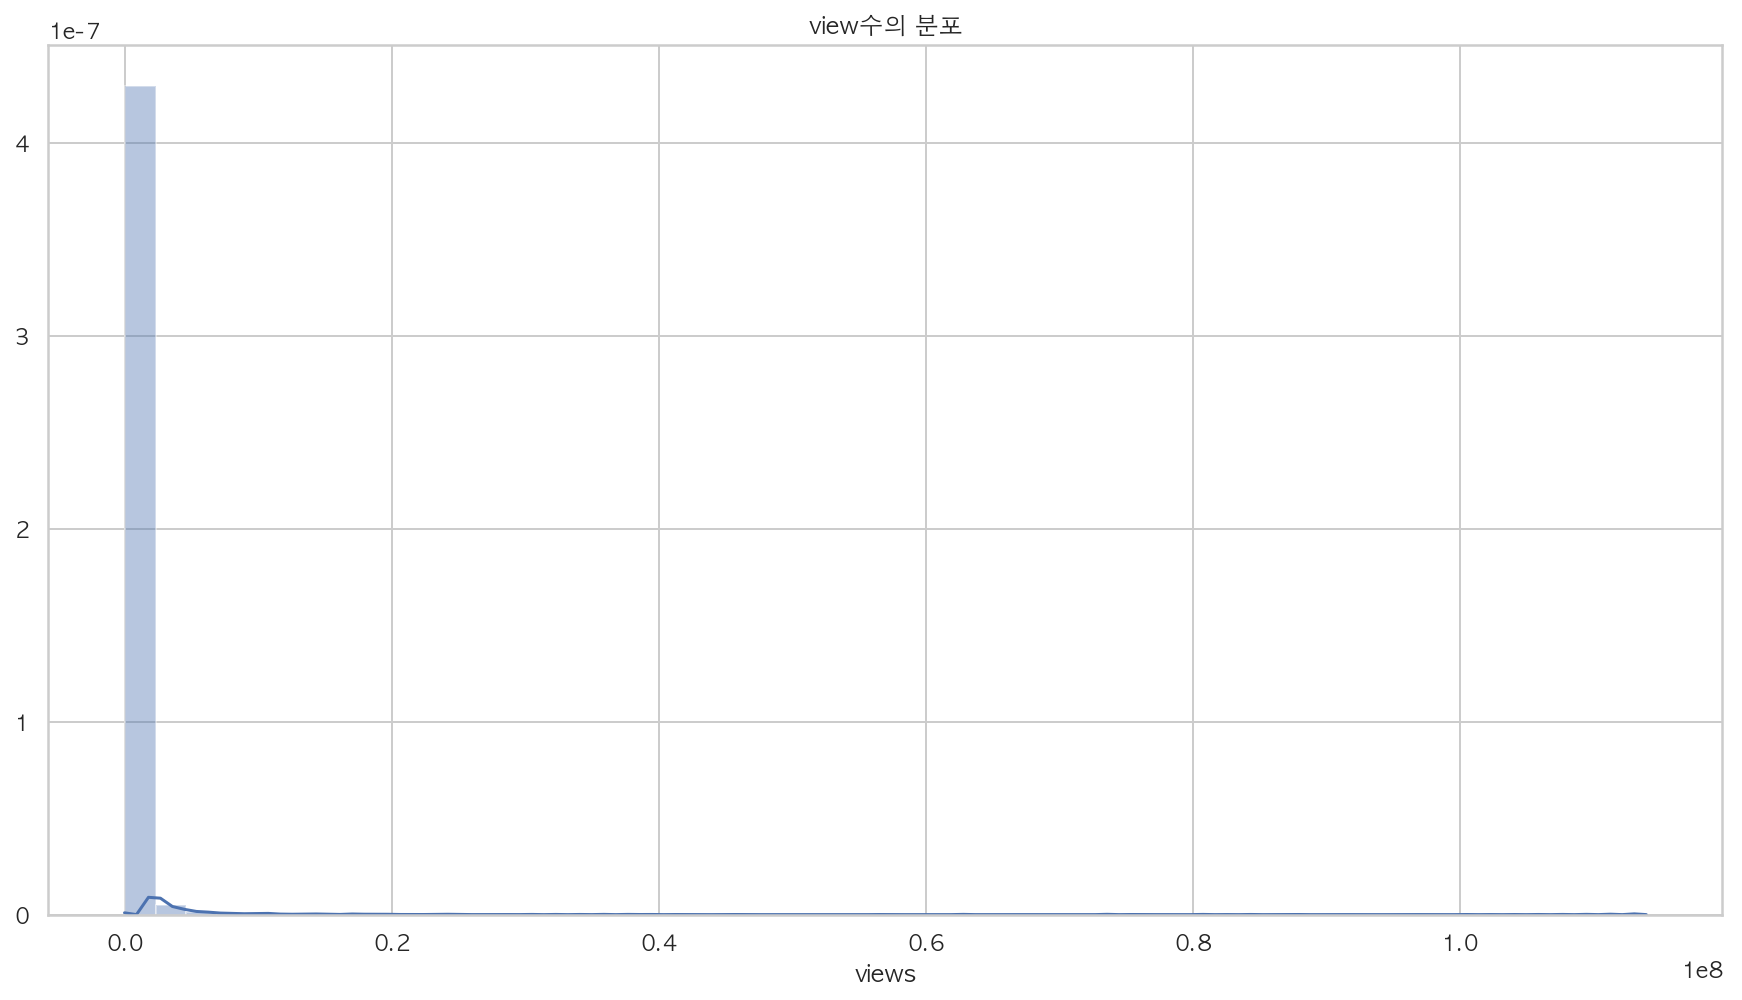

In [5]:
plt.figure(figsize=(15, 8))
sns.distplot(df.views)
plt.title("view수의 분포")
plt.show()

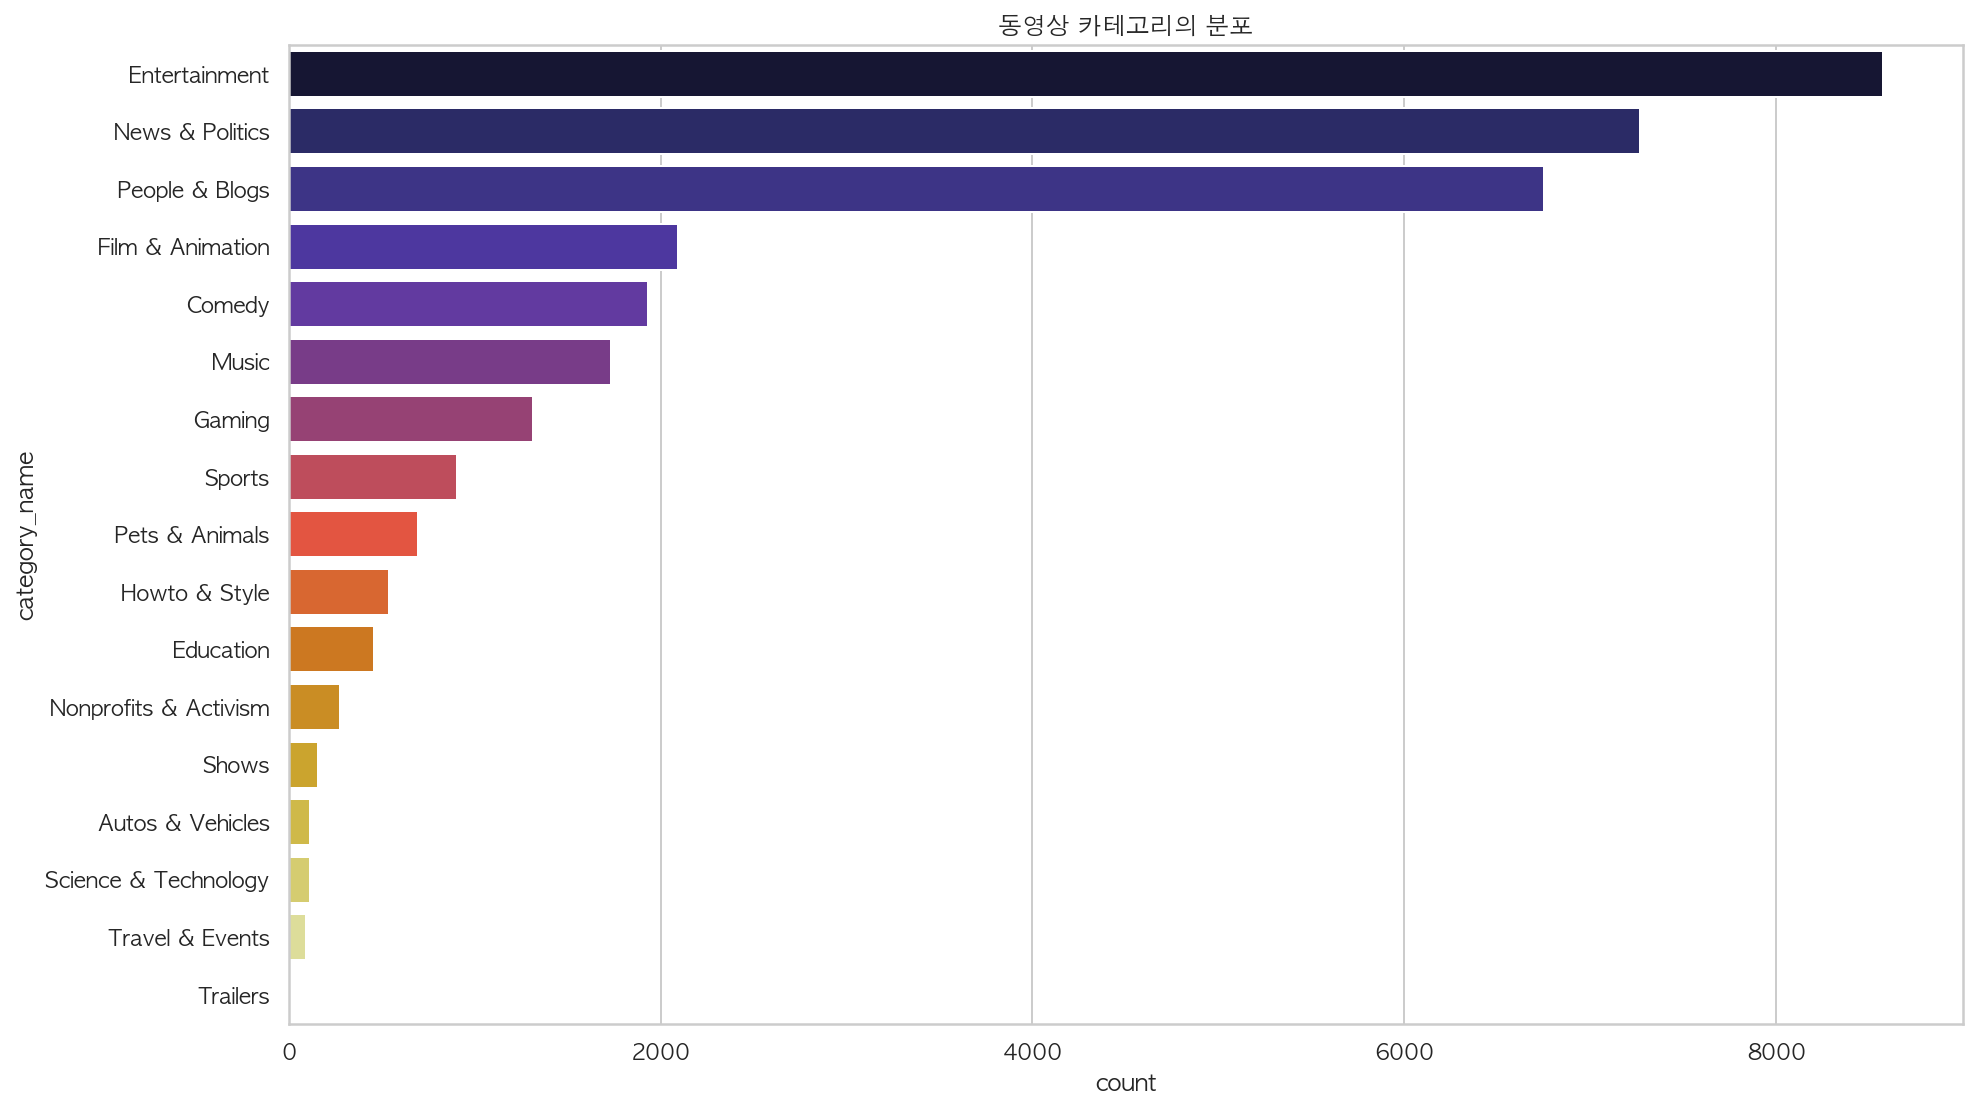

In [6]:
plt.figure(figsize=(15, 9))
sns.countplot(y=df.category_name, palette="CMRmap",
              order=df.category_name.value_counts().index)
plt.title("동영상 카테고리의 분포")
plt.show()

`방금처럼 분포를 그려볼 수 없을 때, 
이 분포의 특성을 나타내는 몇가지 숫자로 데이터의 분포에 대한 정보를 줄 수 있는데, 이 숫자들이 기술통계량이다. `

**(근데 우리는 21세기에 살고 있다. 그냥 그래프로...)**

#### 평균, 중앙값, 최빈값

> **평균을 믿으시나요?**
 
 <img src="https://misc.ridibooks.com/cover/222001933/xxlarge">

#### 최빈값, 중앙값, 평균의 관계

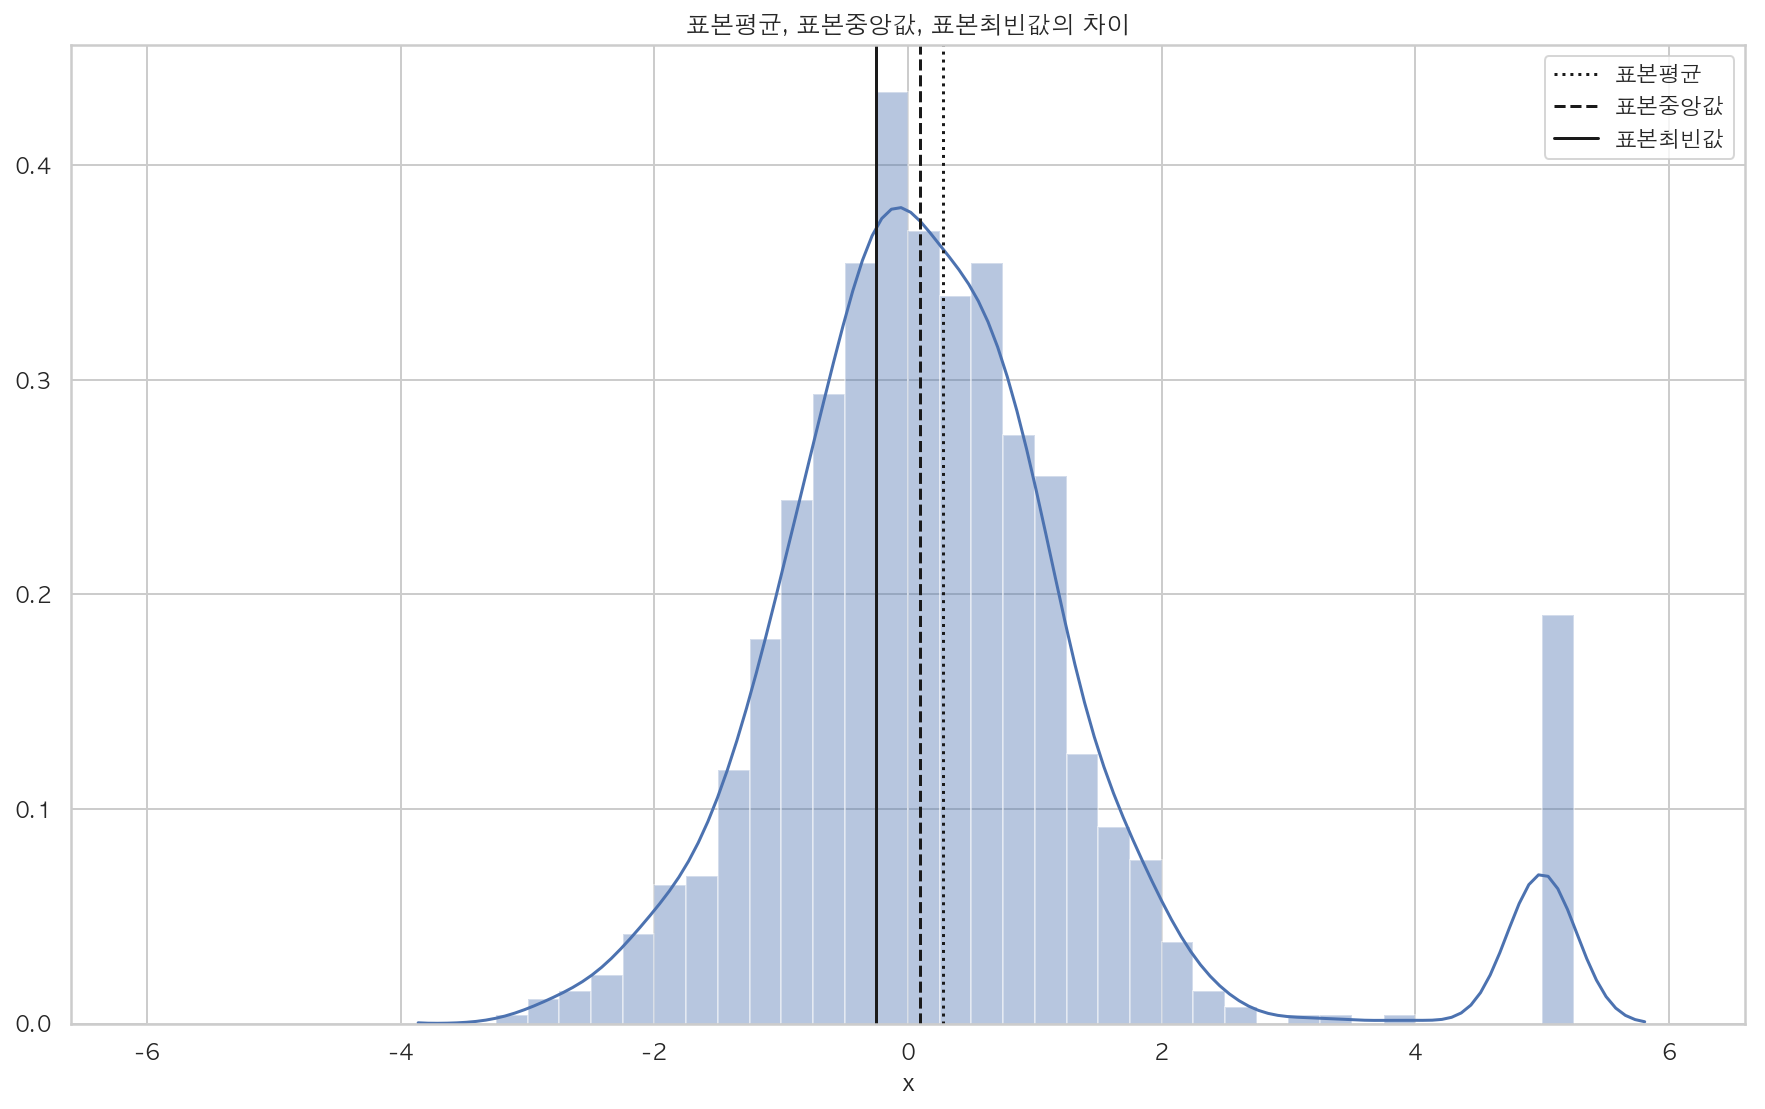

In [7]:
#
np.random.seed(1)
x = np.random.normal(size=1000)
x = np.hstack([x, 5 * np.ones(50)])
bins = np.linspace(-6, 6, 12 * 4 + 1)
plt.figure(figsize=(15, 9))
sns.distplot(x, bins=bins)
plt.axvline(np.mean(x), c='k', ls=":", label="표본평균")
plt.axvline(np.median(x), c='k', ls="--", label="표본중앙값")
ns, _ = np.histogram(x, bins=bins)
plt.axvline(bins[np.argmax(ns)], c='k', ls="-", label="표본최빈값")
plt.title("표본평균, 표본중앙값, 표본최빈값의 차이")
plt.xlabel("x")
plt.legend()
plt.show()

#### Multimodal distribution

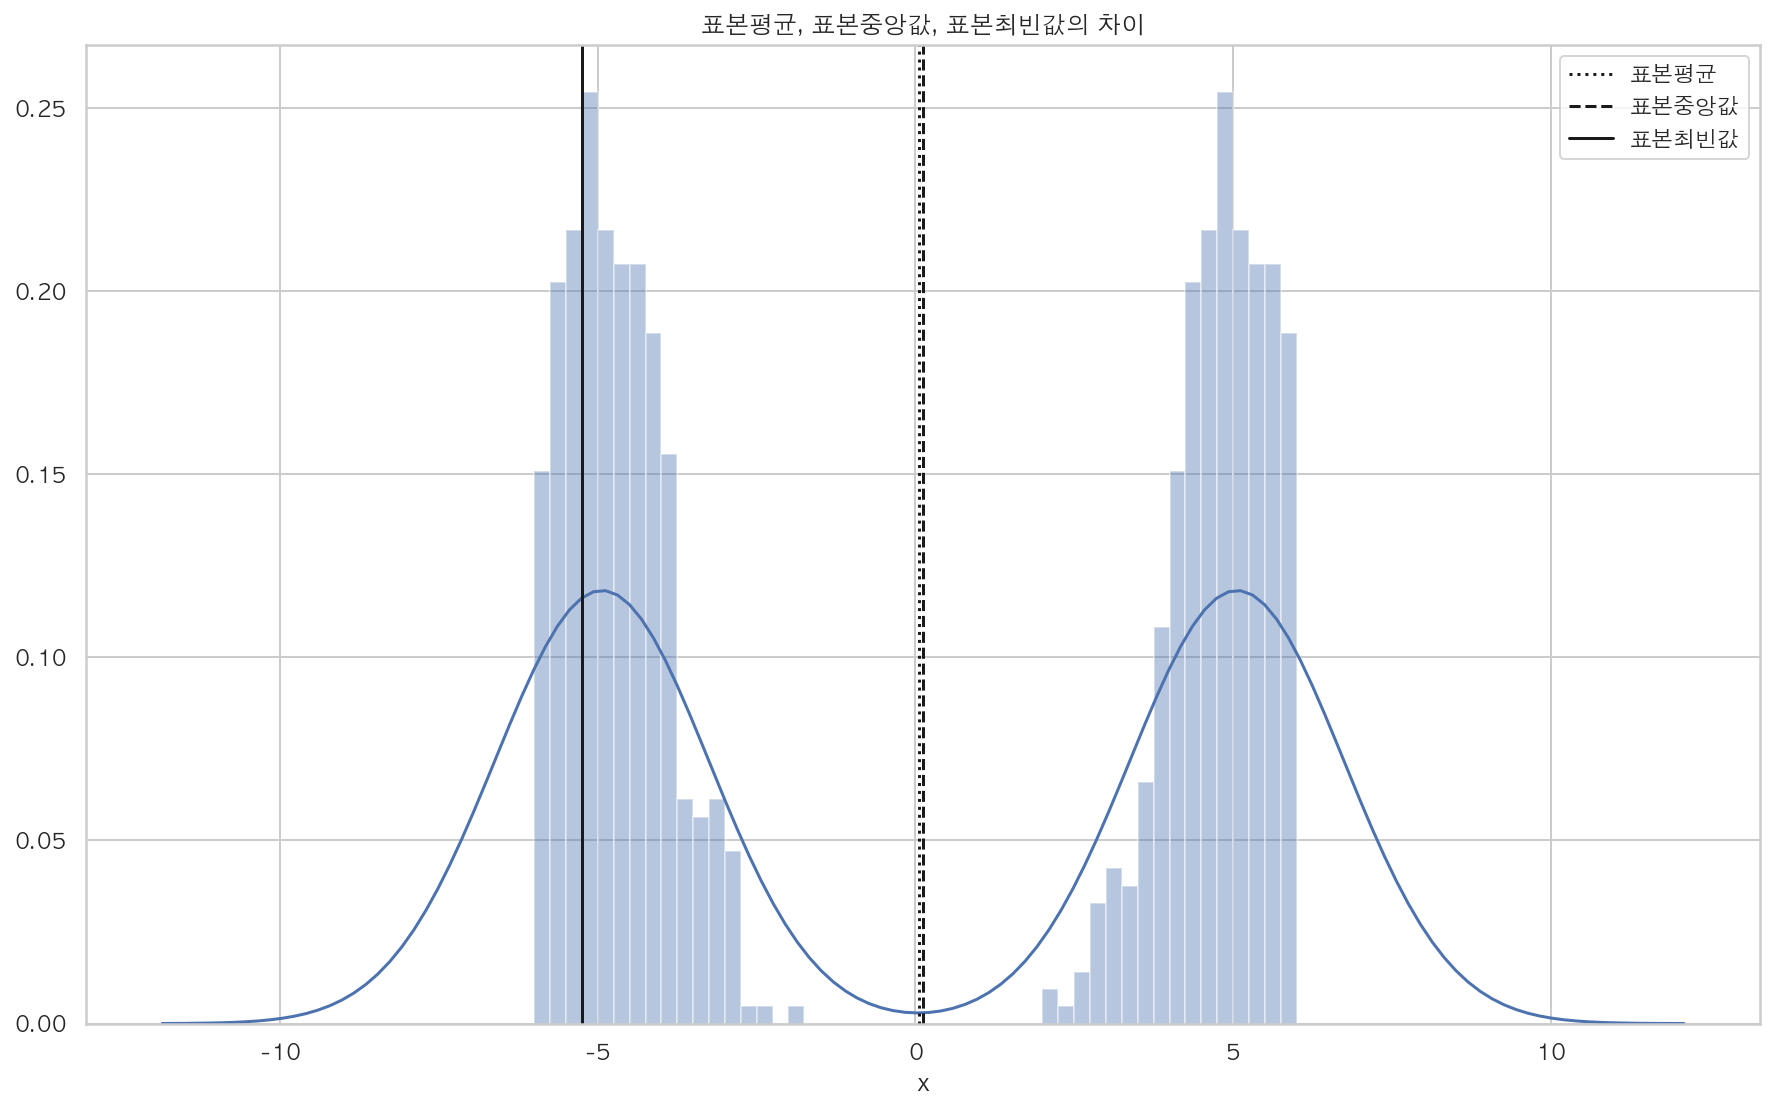

In [8]:
#
np.random.seed(1)
x = np.random.normal(size=500)
x = np.hstack([x - 5, x + 5])
bins = np.linspace(-6, 6, 12 * 4 + 1)
plt.figure(figsize=(15, 9))
sns.distplot(x, bins=bins)
plt.axvline(np.mean(x), c='k', ls=":", label="표본평균")
plt.axvline(np.median(x), c='k', ls="--", label="표본중앙값")
ns, _ = np.histogram(x, bins=bins)
plt.axvline(bins[np.argmax(ns)], c='k', ls="-", label="표본최빈값")
plt.title("표본평균, 표본중앙값, 표본최빈값의 차이")
plt.xlabel("x")
plt.legend()
plt.show()

# 시각화
<p id="vis">
    
 - [Python의 다양한 시각화 패키지](https://towardsdatascience.com/reviewing-python-visualization-packages-fa7fe12e622b)
 - 더 아름다운 시각화를 위해서는 
   * https://d3js.org/
   * https://www.highcharts.com/demo

#### Matplotlib와 Seaborn

* **matplotlib** : https://datascienceschool.net/view-notebook/d0b1637803754bb083b5722c9f2209d0/
* **seaborn** : https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/
* **Pandas** : https://datascienceschool.net/view-notebook/372443a5d90a46429c6459bba8b4342c/

# 시각화의 대원칙 

> # **하나의 시각화는 하나의 의미를 가진다.**

## 가설검정

**여기서 부터가 데이터리포트에 본문 **
<p id="test">
    
   **1.개별 데이터 설명(정량적으로)**<br>
   **2.데이터간의 관계(정량적으로)**<br>
   **3.가설 세우기 / 가설 검정 (정량적으로)**

### 1. 개별데이터 설명

In [9]:
# 1-1데이터 타입 및 데이터의 기본적인 정보
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
category_name             object
dtype: object

In [10]:
# 주요 카테고리 변수의 카테고리 갯수
print("num of channels :", len(df.channel_title.unique()))
print("num of categories :", len(df.category_name.unique()))

num of channels : 3971
num of categories : 17


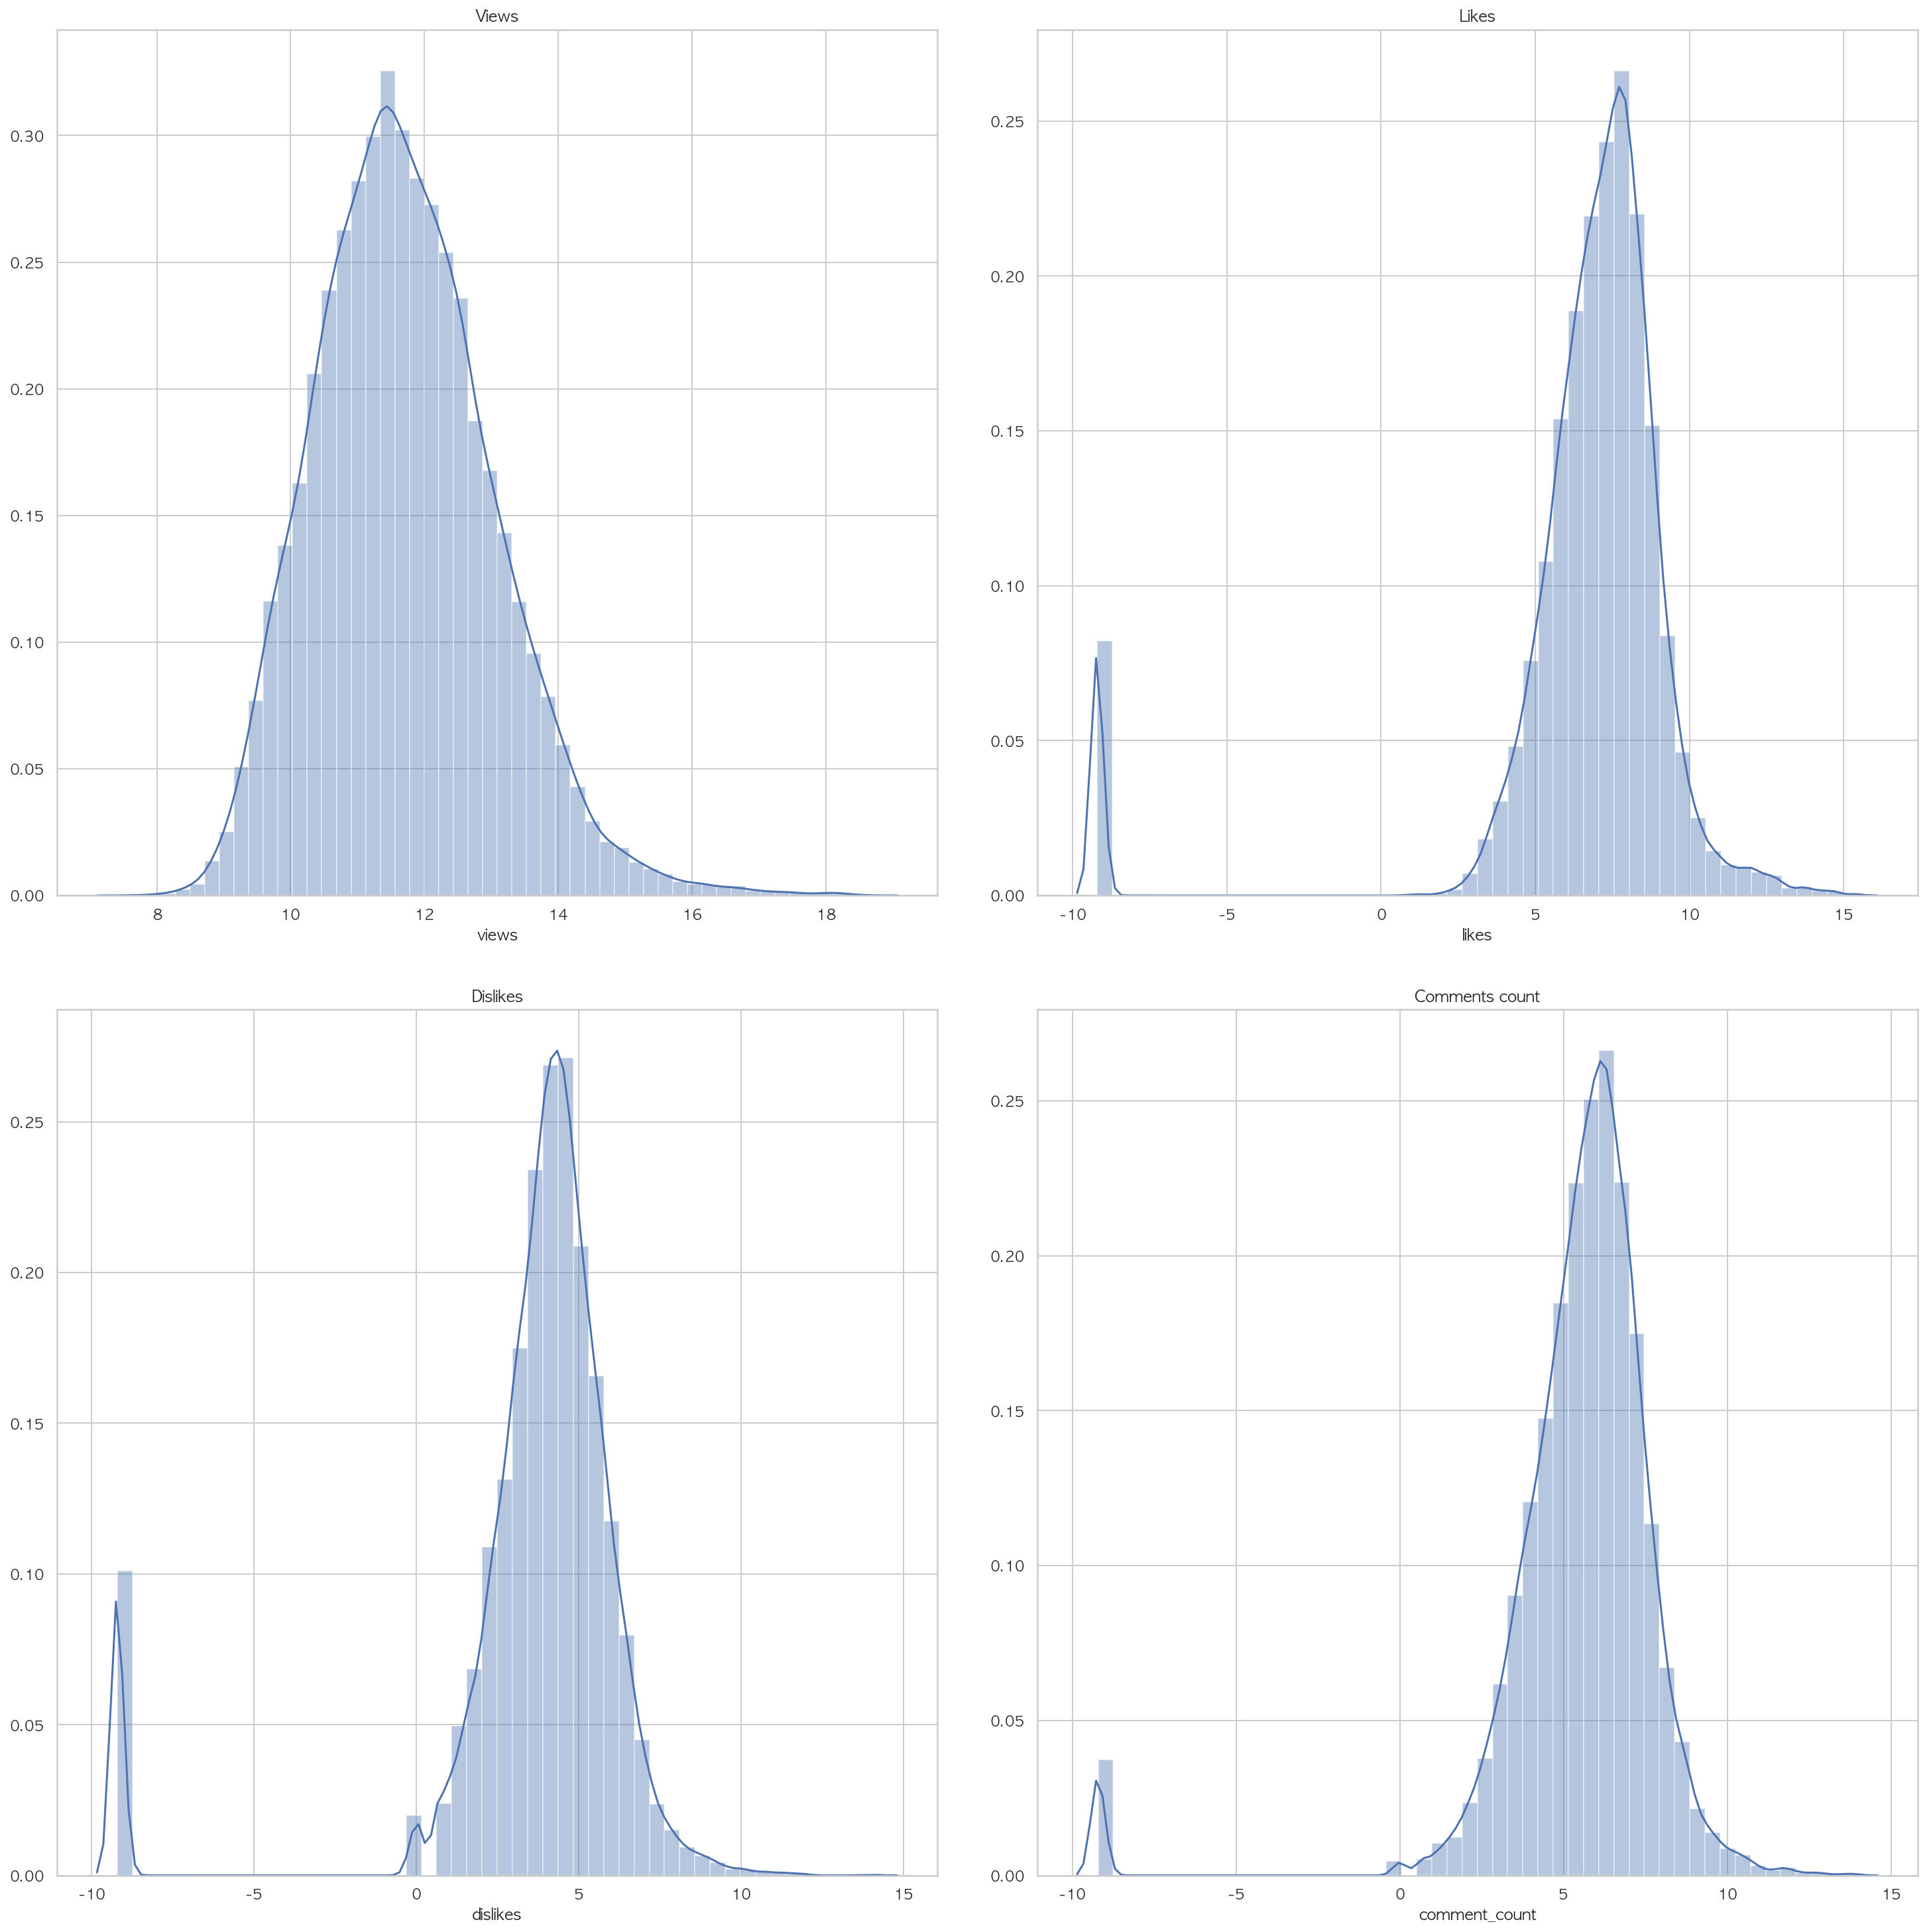

In [11]:
# 주요 실수형 자료의 분포
plt.figure(figsize=(21, 21))
plt.subplot(2, 2, 1)
sns.distplot(df.views.apply(np.log))
plt.title("Views")
plt.subplot(2, 2, 2)
sns.distplot(df.likes.apply(lambda x: np.log(x+1e-4)))
plt.title("Likes")
plt.subplot(2, 2, 3)
sns.distplot(df.dislikes.apply(lambda x: np.log(x+1e-4)))
plt.title("Dislikes")
plt.subplot(2, 2, 4)
sns.distplot(df.comment_count.apply(lambda x: np.log(x+1e-4)))
plt.title("Comments count")
plt.tight_layout()
plt.show()

In [12]:
import datetime


def str2date(s):

    string_format = '%y.%d.%m'

    return datetime.datetime.strptime(s, string_format)


def str2date2(s):
    s = s.replace("T", " ")
    s = s[:-5]

    string_format = '%Y-%m-%d %H:%M:%S'

    return datetime.datetime.strptime(s, string_format)

In [13]:
df.trending_date = df.trending_date.apply(str2date)

df.publish_time = df.publish_time.apply(str2date2)

df["trending_lag"] = df.trending_date - df.publish_time

df.trending_lag = df.trending_lag.apply(lambda x: x.days)

df.trending_lag = df.trending_lag.apply(lambda x: x if x < 50 else 50)

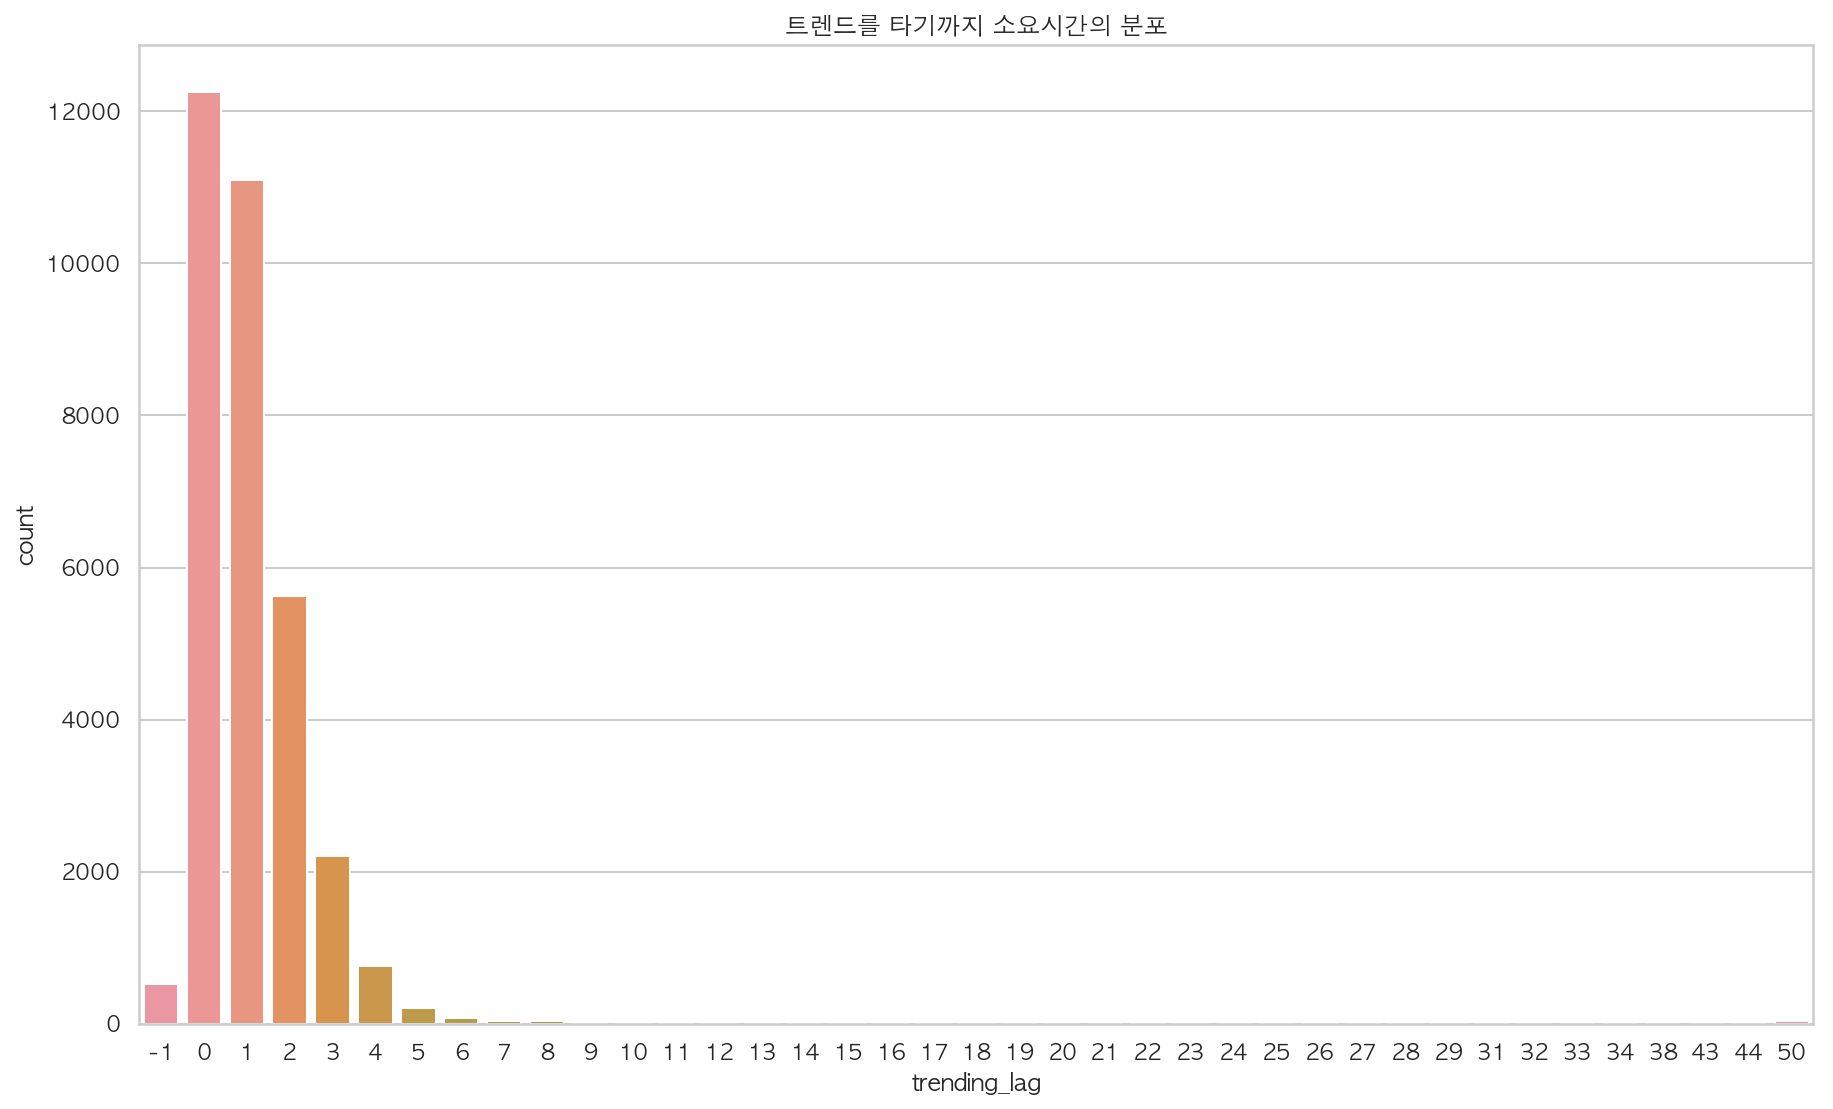

In [14]:
plt.figure(figsize=(15, 9))
sns.countplot(x=df.trending_lag)
plt.title("트렌드를 타기까지 소요시간의 분포")
plt.show()

### 2. 변수들간의 관계 탐구

 - 이 때는 주로 목적으로하는 변수를 중심으로 분석을 시작한다. 
 - 이 케이스에서는 조회수를 타겟으로 하겠다.

##### Pairplot

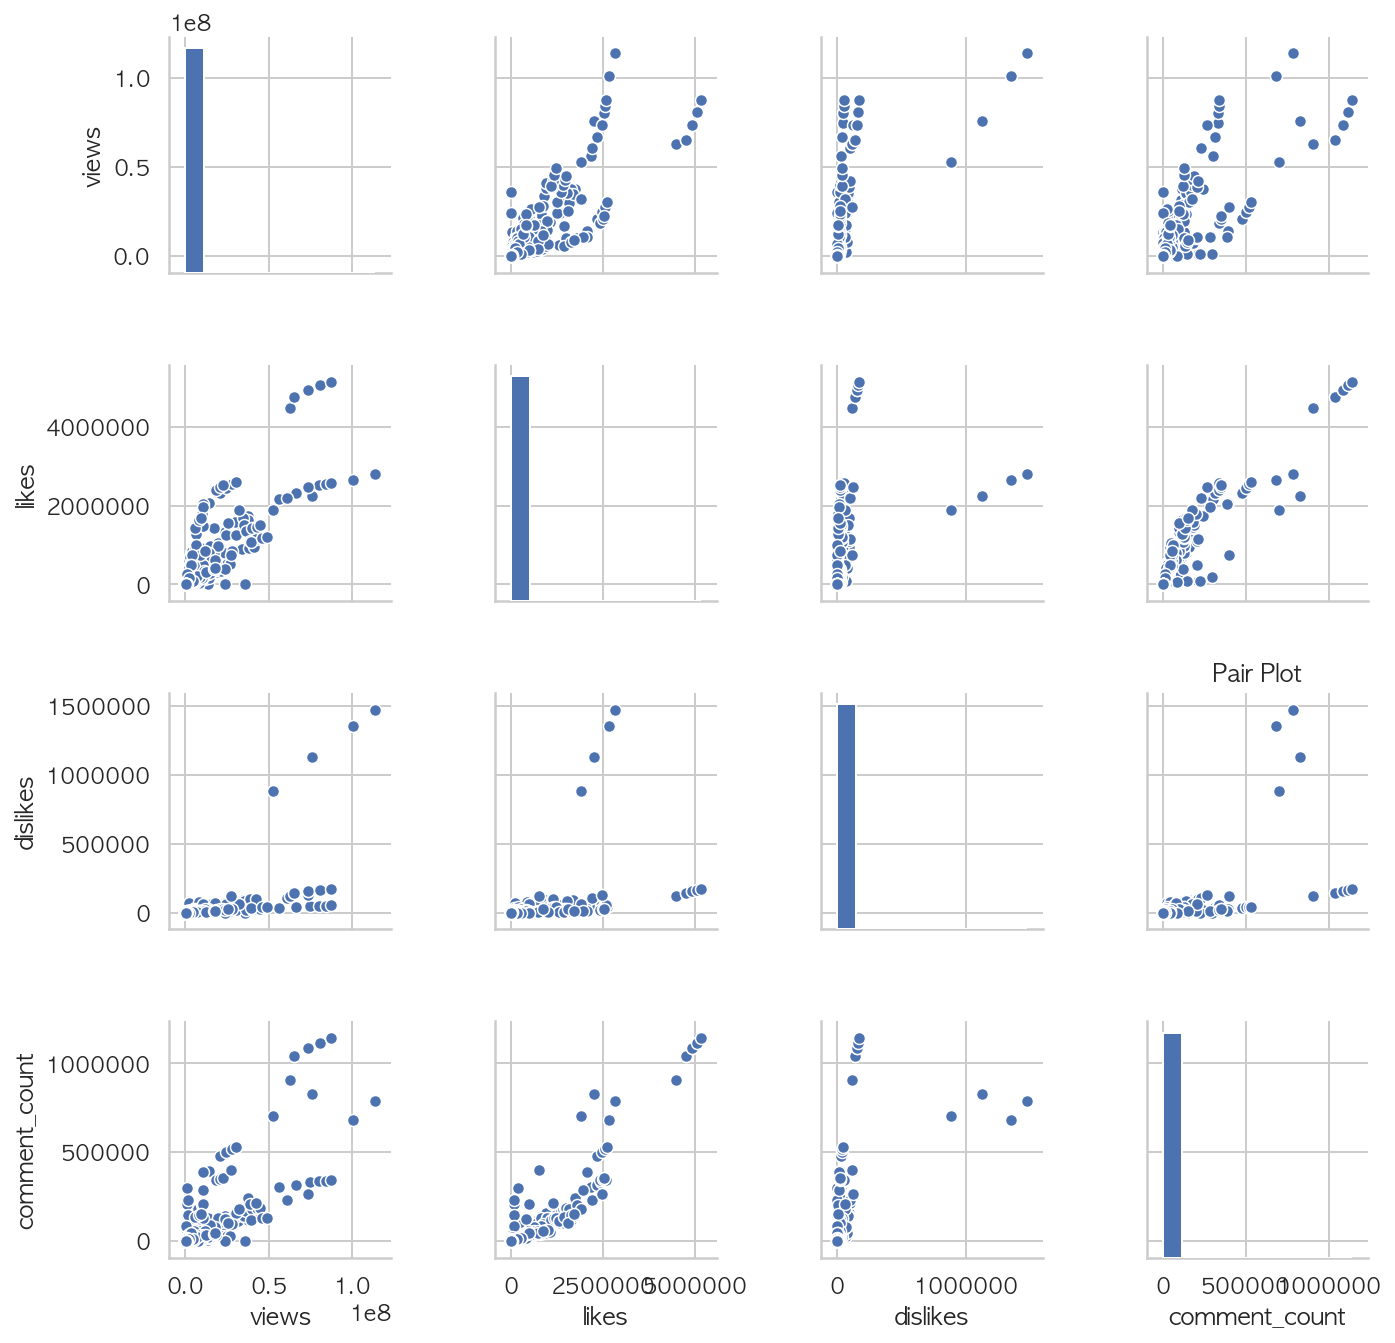

In [15]:
sns.pairplot(df[["views", "likes", "dislikes", "comment_count"]])
plt.title("Pair Plot")
plt.show()

##### Pearson 상관계수 ; $r, \rho$

**; 두 실수형 변수에 대한 선형적 관계를 정량화**

[wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

$$
\rho_{i, j} = \dfrac{cov(x_i, x_j)}{var(x_i)var(x_j)}
$$


In [16]:
for col in ["likes", 'dislikes', 'comment_count']:
    print("views vs {}".format(col),
          sp.stats.stats.pearsonr(df.views, df[col]))

views vs likes (0.861506182616547, 0.0)
views vs dislikes (0.5819256986871084, 0.0)
views vs comment_count (0.811096053636273, 0.0)


In [17]:
df[["views", "likes", "dislikes", "comment_count"]].corr()

views     likes  dislikes  comment_count
views          1.000000  0.861506  0.581926       0.811096
likes          0.861506  1.000000  0.427723       0.927405
dislikes       0.581926  0.427723  1.000000       0.556256
comment_count  0.811096  0.927405  0.556256       1.000000

**상관계수 히트맵**

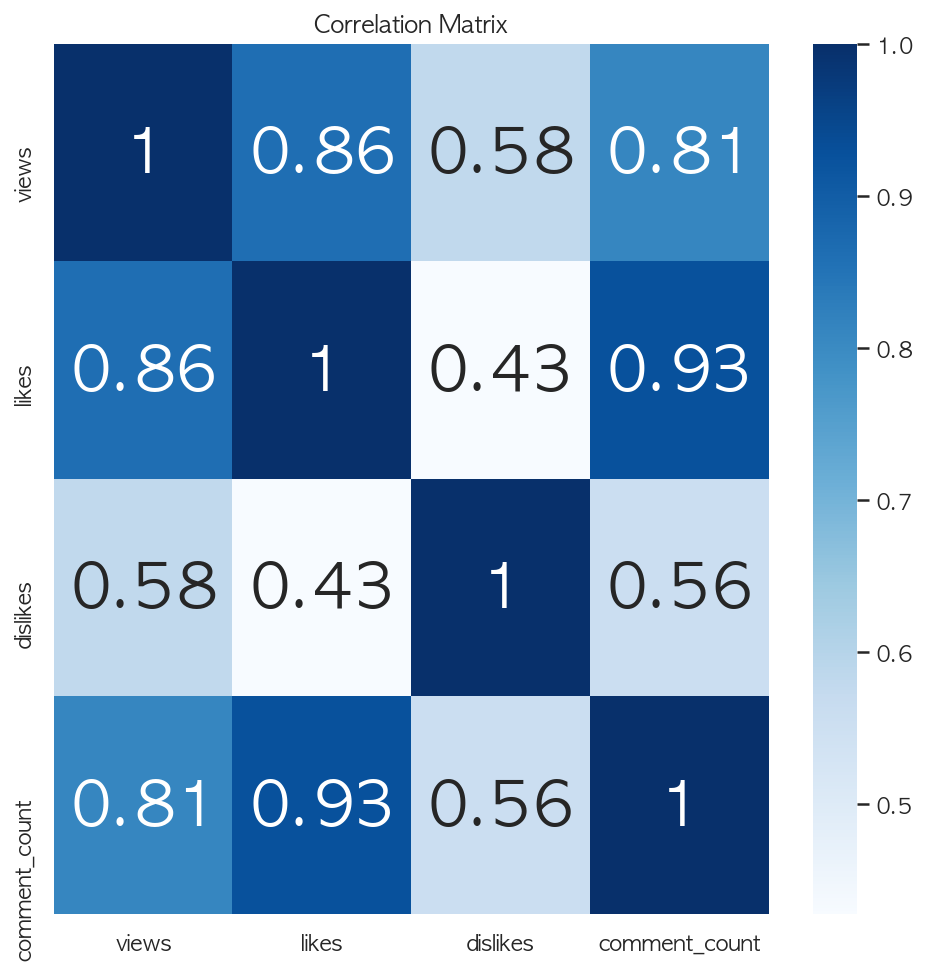

In [18]:
#
plt.figure(figsize=(8, 8))
sns.heatmap(df[["views", "likes", "dislikes", "comment_count"]].corr(), 
            annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

#####  Pearson correlation 의 한계 
  - Pearson 상관계수는 두 변수간의 선형적인 상관관계만을 나타내는 숫자이다. 
  - 따라서 숫자만으로 상관관계를 파악하기 보다 그래프를 꼭 그려서 확인하도록 한다. 

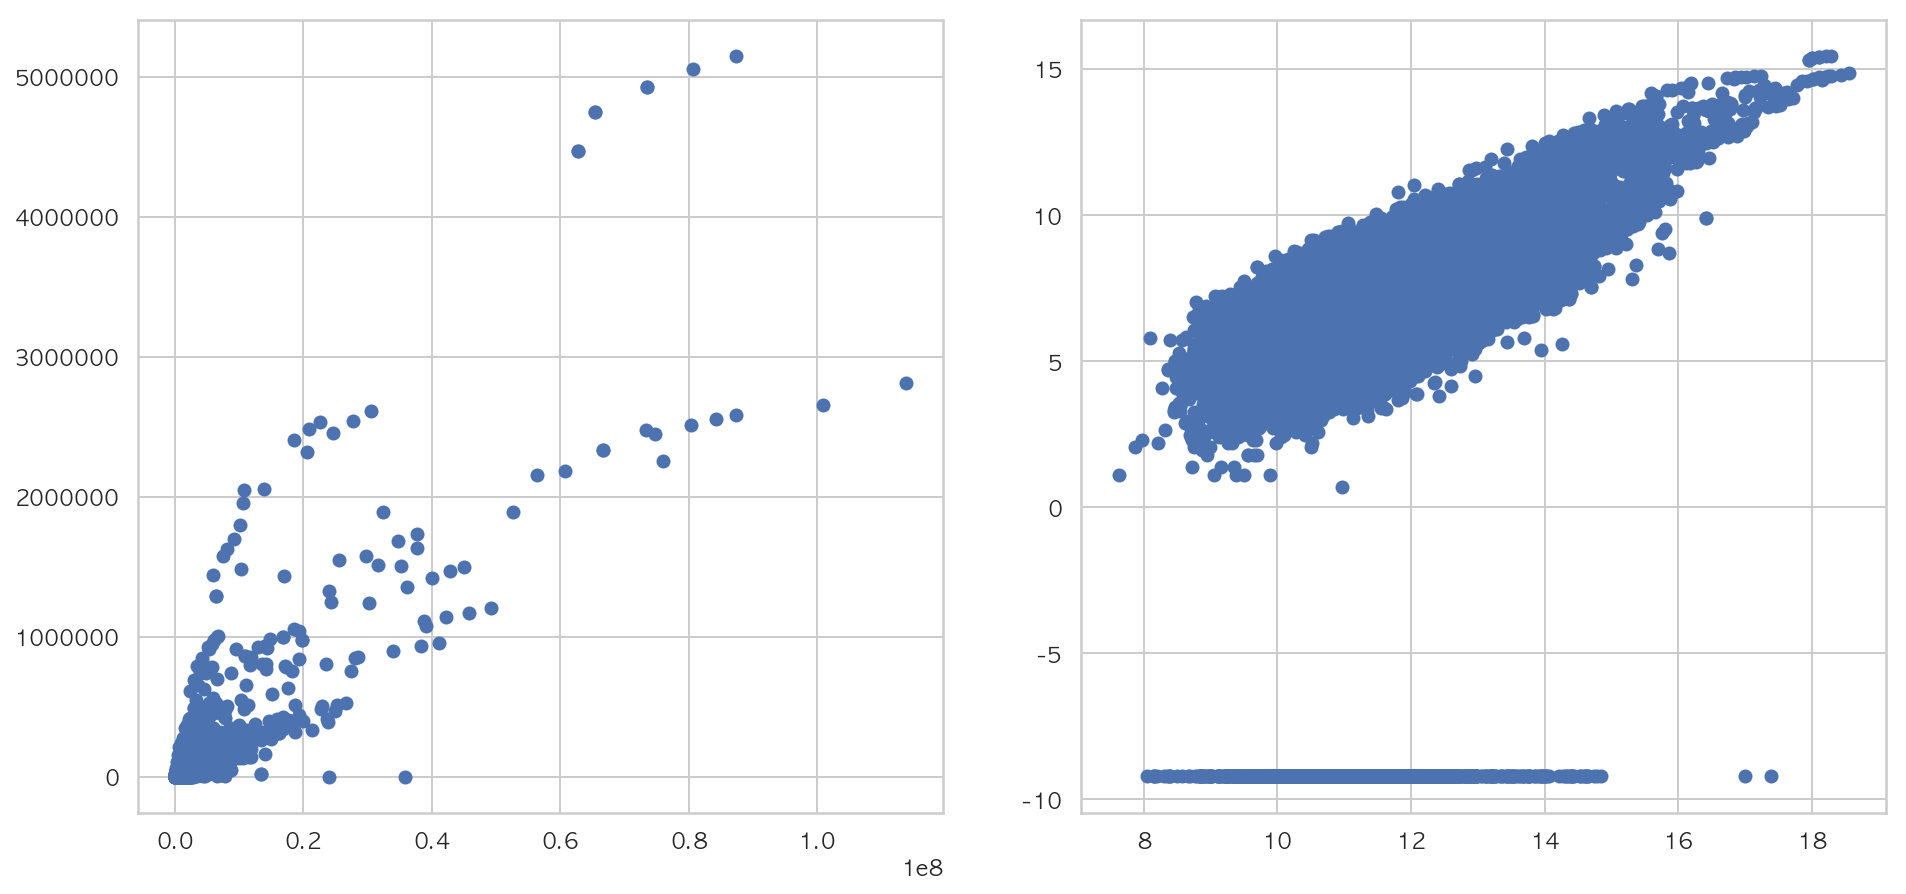

In [19]:
#
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(df.views, df.likes)
plt.subplot(1, 2, 2)
plt.scatter(df.views.apply(np.log), df.likes.apply(lambda x: np.log(x+1e-4)))
plt.tight_layout()
plt.show()

In [20]:
print("로그화한 views 와 likes의 상관계수", sp.stats.stats.pearsonr(
    df.views.apply(np.log), df.likes.apply(lambda x: np.log(x+1e-4))))

로그화한 views 와 likes의 상관계수 (0.38501928621985515, 0.0)


##### 카테고리 변수와의 관계

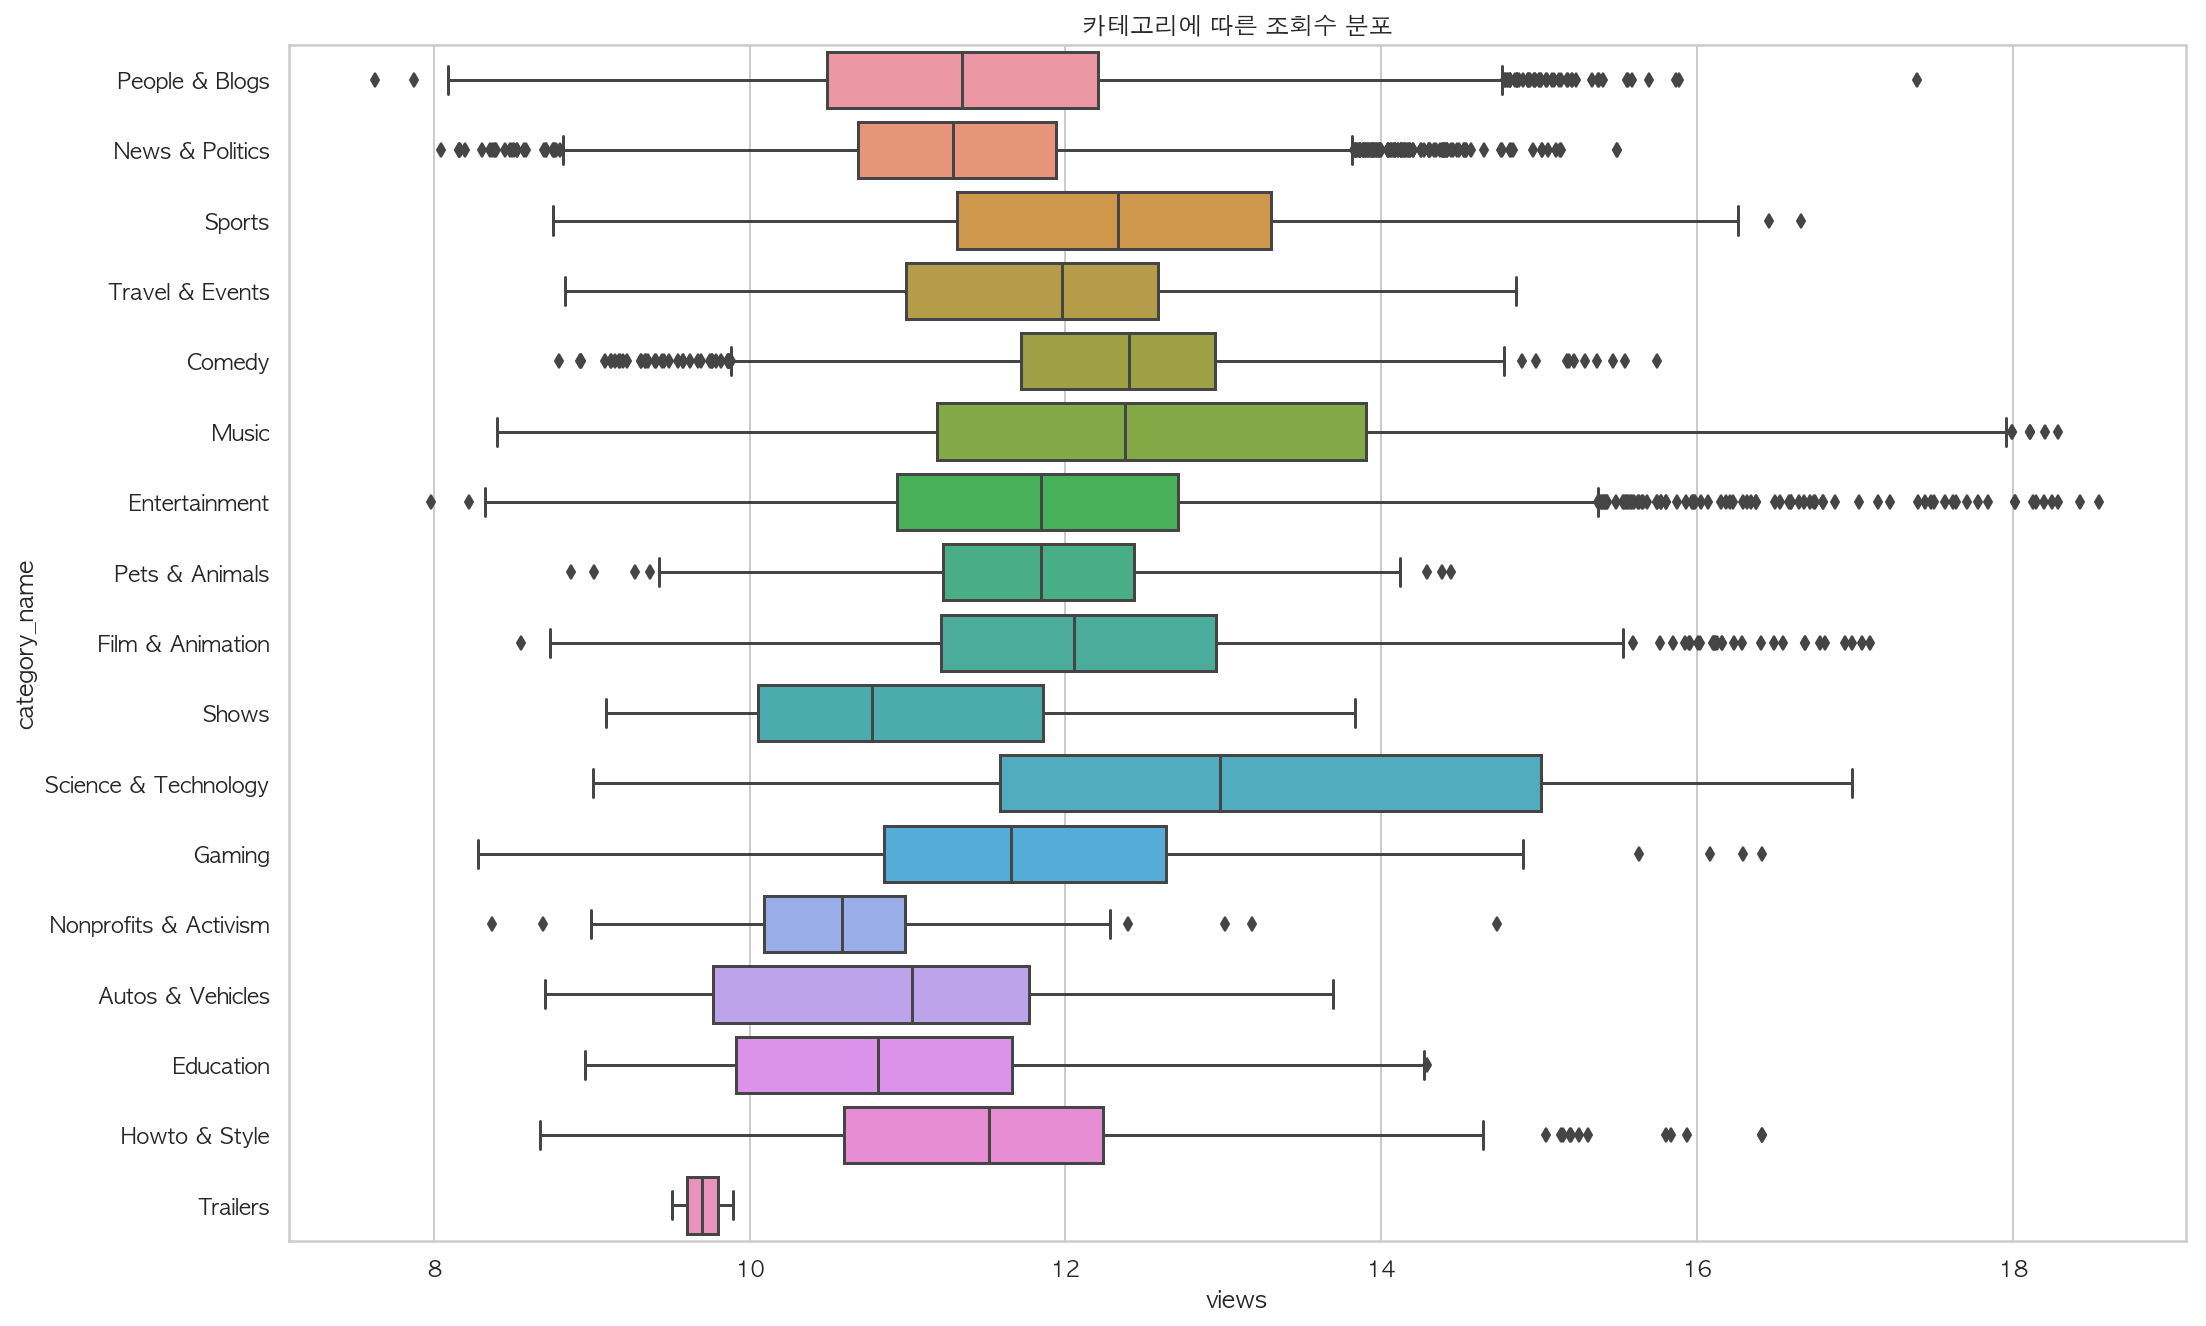

In [21]:
#
plt.figure(figsize=(17, 11))
sns.boxplot(x=df.views.apply(np.log), y=df.category_name)
plt.title("카테고리에 따른 조회수 분포")
plt.show()

##### One-way anova

In [22]:
result = sm.OLS.from_formula("np.log(views) ~ C(category_name)", df).fit()

sm.stats.anova_lm(result)

df        sum_sq     mean_sq           F  PR(>F)
C(category_name)     16.0   5531.078213  345.692388  217.070905     0.0
Residual          33006.0  52563.115183    1.592532         NaN     NaN

In [23]:
model = sm.OLS.from_formula(
    "np.log(views) ~ np.log(likes + 1e-4) + np.log(comment_count + 1e-4) + C(category_name) - 1", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(views)   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     978.1
Date:                Wed, 22 May 2019   Prob (F-statistic):               0.00
Time:                        21:38:37   Log-Likelihood:                -49126.
No. Observations:               33023   AIC:                         9.829e+04
Df Residuals:                   33004   BIC:                         9.845e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [24]:
# sm.stats.multicomp.MultiComparison(df.views.apply(np.log), df.category_name).tukeyhsd().summary()

In [25]:
sm.stats.anova_lm(result, typ=2)

sum_sq       df             F  \
C(category_name)              499836.405331     17.0  25613.948568   
np.log(likes + 1e-4)            1639.855409      1.0   1428.575267   
np.log(comment_count + 1e-4)    7861.636630      1.0   6848.737748   
Residual                       37885.149771  33004.0           NaN   

                                     PR(>F)  
C(category_name)               0.000000e+00  
np.log(likes + 1e-4)          4.449192e-306  
np.log(comment_count + 1e-4)   0.000000e+00  
Residual                                NaN

### 3. 가설을 만들자

**가설 검정에서 가장 중요한 것은 의미있는 가설을 설정하는 일이다.**

**이에 대해 데이터에 따라 만들 수 있는 가설은 무수히 많다.**

다음에 무엇을 해야할지 모르는 와중에서 수없이 많은 시도를 해 데이터 속에 담긴 의미 있는 정보를 찾아내는 것이 데이터분석가가 하는 일이기에 호기심을 가지고 계속 데이터를 탐색한다.

**조회 수가 많은 데이터는 무슨 특징이 있을까 ?**

In [26]:
df.sort_values(by="views", ascending=False)[
    ["category_name", "title", "channel_title", "views", "likes", "dislikes"]].head(10)

category_name                                              title  \
4742   Entertainment  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
4583   Entertainment  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
3949   Entertainment  Marvel Studios' Avengers: Infinity War Officia...   
29333          Music                BTS (방탄소년단) 'FAKE LOVE' Official MV   
3681   Entertainment  Marvel Studios' Avengers: Infinity War Officia...   
29072          Music                BTS (방탄소년단) 'FAKE LOVE' Official MV   
3475   Entertainment  Marvel Studios' Avengers: Infinity War Officia...   
4384   Entertainment  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
3312   Entertainment  Marvel Studios' Avengers: Infinity War Officia...   
28841          Music                BTS (방탄소년단) 'FAKE LOVE' Official MV   

              channel_title      views    likes  dislikes  
4742      YouTube Spotlight  113876217  2811223   1470388  
4583      YouTube Spotlight  100911567  2656686   1353663  
3949   Marvel Entertainment   87450245  2584675     52176  
29333               ibighit   87430865  5150839    172570  
3681   Marvel Entertainment   84281319  2555414     51008  
29072               ibighit   80738011  5053338    165854  
3475   Marvel Entertainment   80360459  2513104     49170  
4384      YouTube Spotlight   75969469  2251837   1127817  
3312   Marvel Entertainment   74789251  2444965     46172  
28841               ibighit   73463137  4924056    156026

In [27]:
df.groupby(by="channel_title").max().sort_values(by="views", ascending=False)[
    ["category_name", "title", "views", "likes", "dislikes"]].head(10)

category_name  \
channel_title                                 
YouTube Spotlight             Entertainment   
Marvel Entertainment          Entertainment   
ibighit                               Music   
ChildishGambinoVEVO                   Music   
Sony Pictures Entertainment   Entertainment   
jypentertainment                      Music   
Bruno Mars                            Music   
Kylie Jenner                 People & Blogs   
TaylorSwiftVEVO                       Music   
ArianaGrandeVevo                      Music   

                                                                         title  \
channel_title                                                                    
YouTube Spotlight            YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
Marvel Entertainment         Where Were Ant-Man and the Wasp? | New Trailer...   
ibighit                                             j-hope 'Daydream (백일몽)' MV   
ChildishGambinoVEVO          Childish Gambino - This Is America (Official V...   
Sony Pictures Entertainment                      VENOM - Official Trailer (HD)   
jypentertainment                                             Yubin 숙녀 (淑女) M/V   
Bruno Mars                   Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...   
Kylie Jenner                                                   To Our Daughter   
TaylorSwiftVEVO                 Taylor Swift - End Game ft. Ed Sheeran, Future   
ArianaGrandeVevo                          Ariana Grande - No Tears Left To Cry   

                                 views    likes  dislikes  
channel_title                                              
YouTube Spotlight            113876217  2811223   1470388  
Marvel Entertainment          87450245  2584675     52176  
ibighit                       87430865  5150839    172570  
ChildishGambinoVEVO           73432600  2478908    124291  
Sony Pictures Entertainment   49185287  1204868     42254  
jypentertainment              42267579  1141242     99548  
Bruno Mars                    37728802  1629948     56304  
Kylie Jenner                  35832484        0         0  
TaylorSwiftVEVO               35218973  1681449     91765  
ArianaGrandeVevo              32331284  1890564     64058

**조회수 상위 10%의 카테고리들의 분포는 다를까?**

In [28]:
df["views"].quantile(0.9)

677631.5999999999

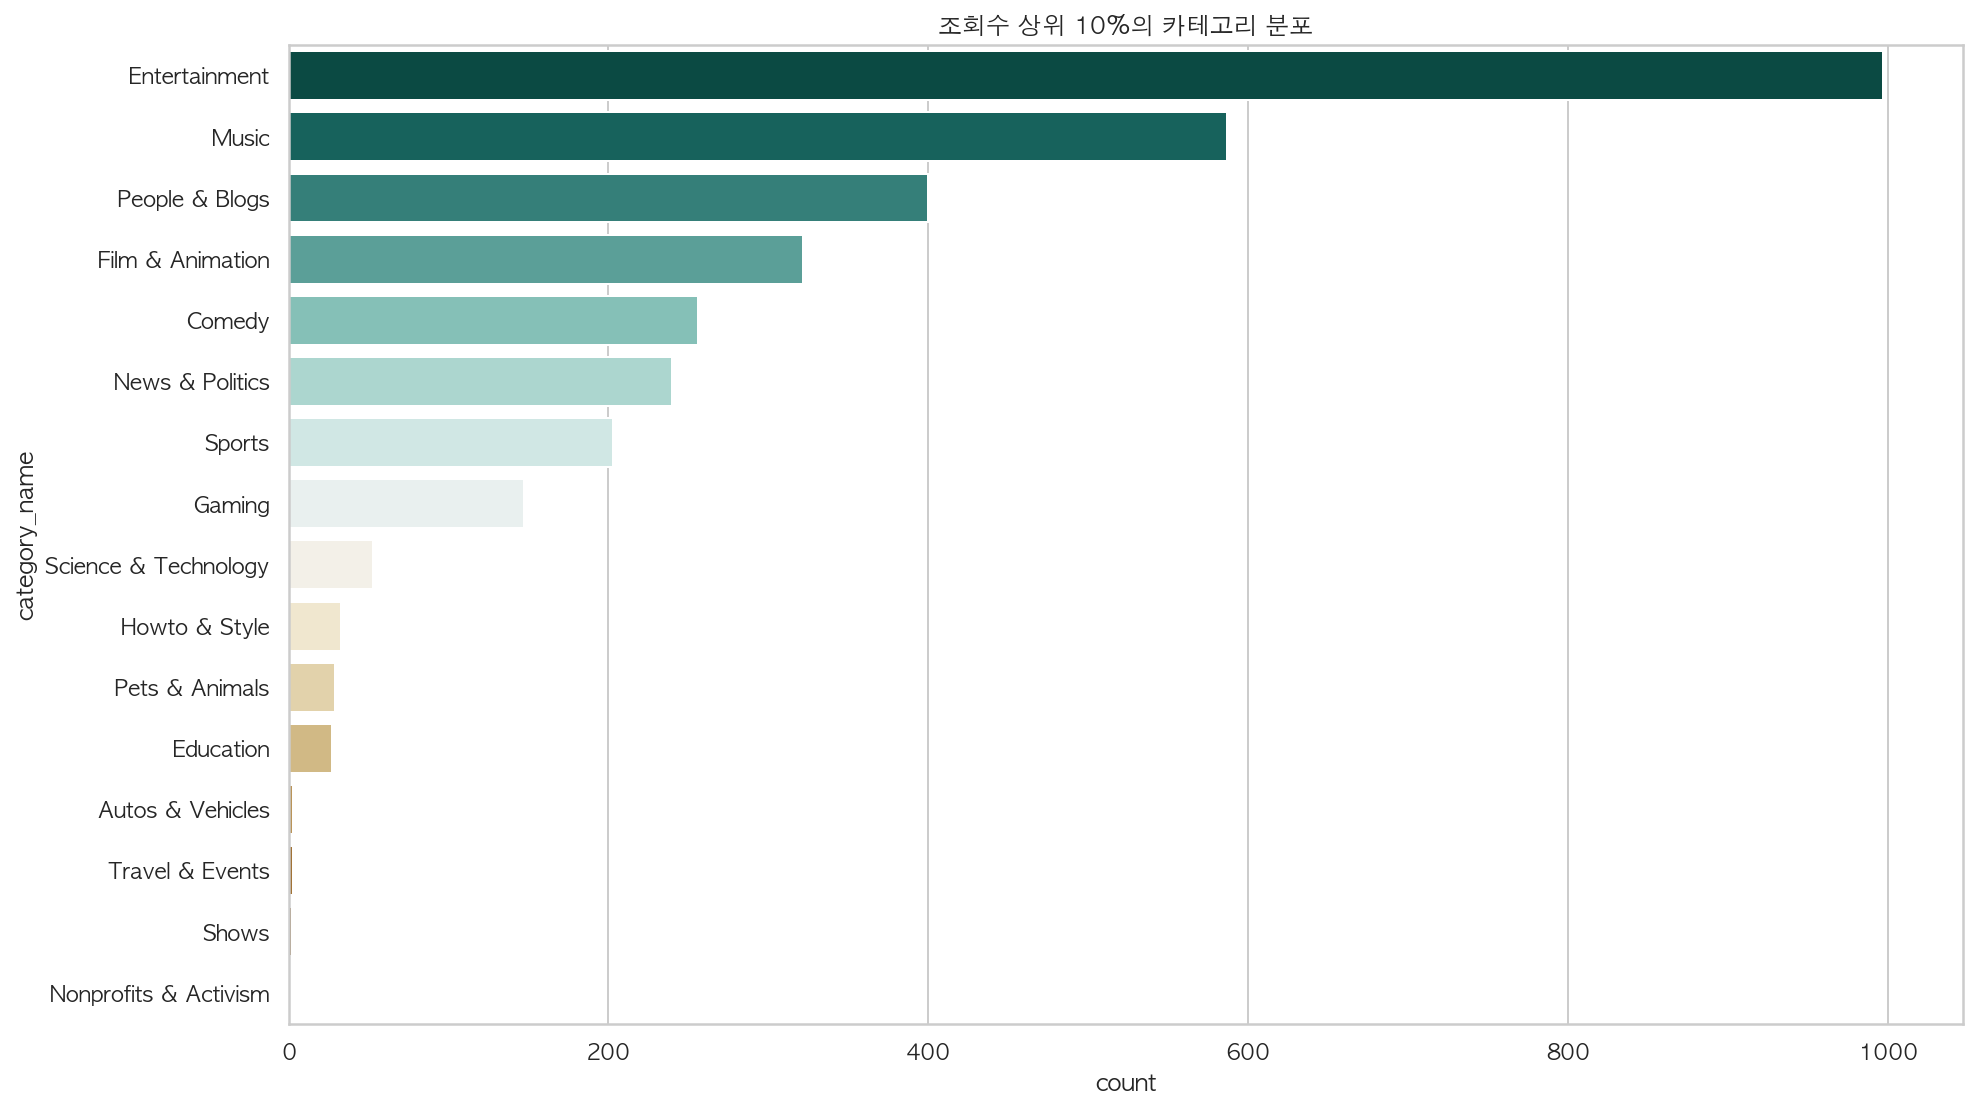

In [29]:
#
plt.figure(figsize=(15, 9))
top10p_viewed = df.where(df.views >= df["views"].quantile(
    0.9)).sort_values(by="views", ascending=False)
sns.countplot(y=top10p_viewed.category_name,
              order=top10p_viewed.category_name.value_counts().index,
              palette="BrBG_r")
plt.title("조회수 상위 10%의 카테고리 분포")
plt.show()

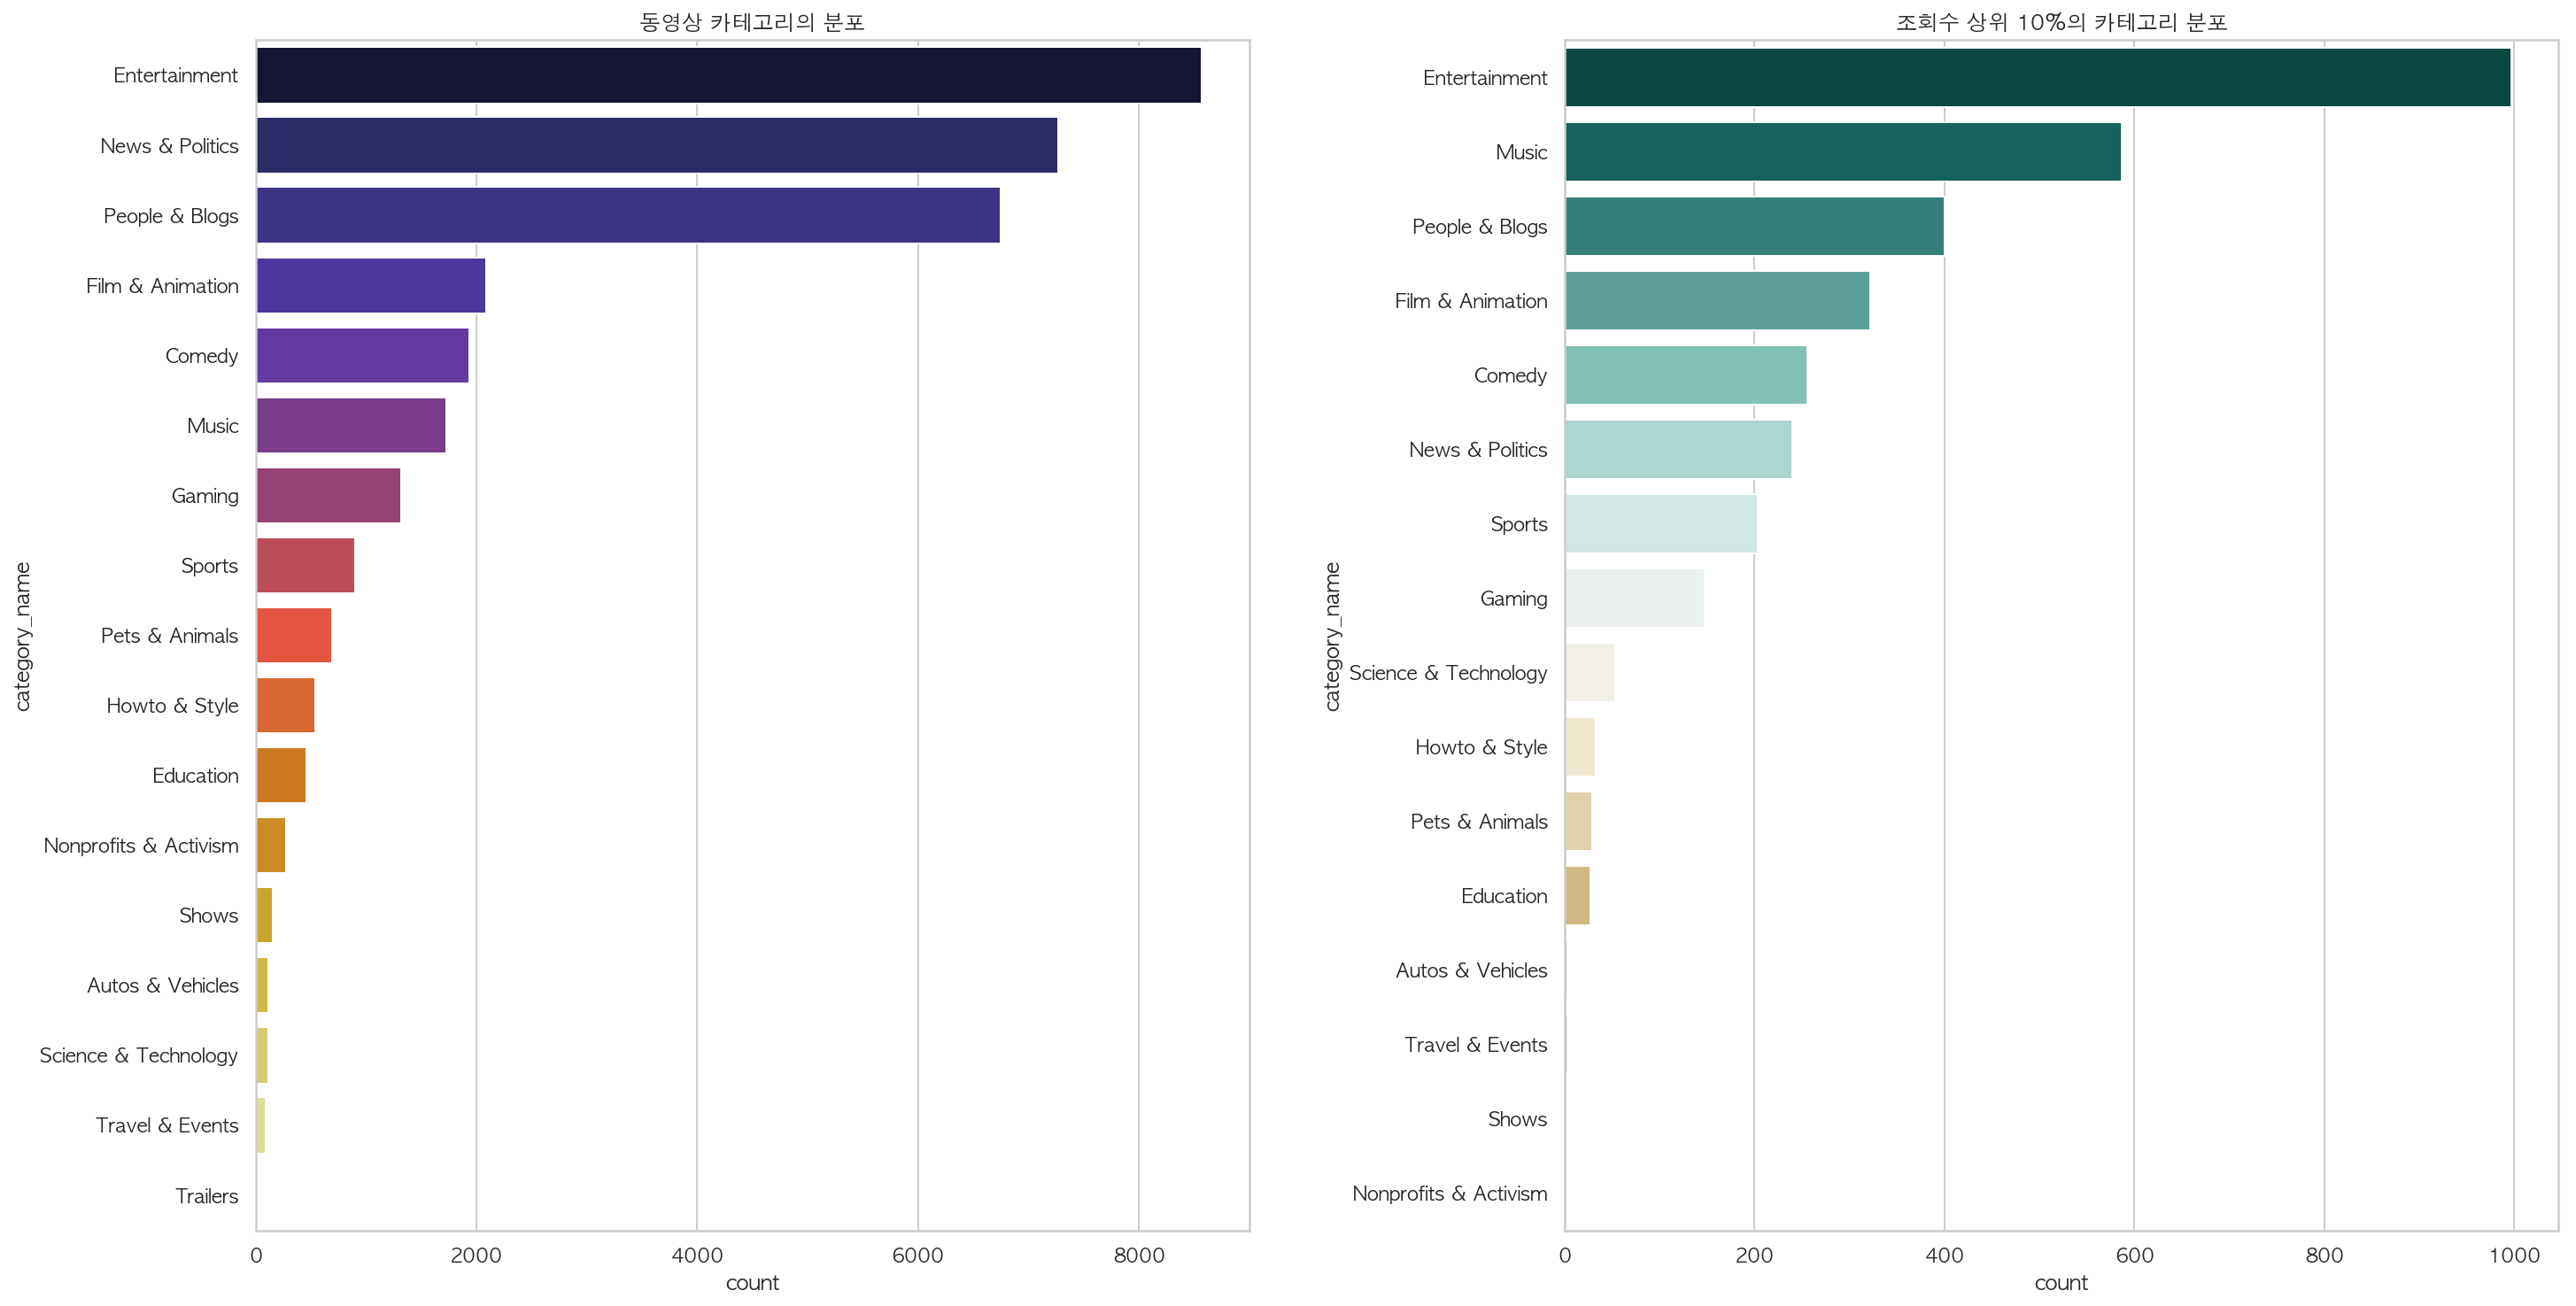

In [30]:
#
plt.figure(figsize=(21, 11))
plt.subplot(1, 2, 1)
sns.countplot(y=df.category_name, palette="CMRmap",
              order=df.category_name.value_counts().index)
plt.title("동영상 카테고리의 분포")

plt.subplot(1, 2, 2)
top10p_viewed = df.where(df.views >= df.quantile(
    0.9)["views"]).sort_values(by="views", ascending=False)
sns.countplot(y=top10p_viewed.category_name,
              order=top10p_viewed.category_name.value_counts().index,
              palette="BrBG_r")
plt.title("조회수 상위 10%의 카테고리 분포")

plt.tight_layout()
plt.show()

**방금과 같은 질문을 꾸준히 하다보면 주장하고 싶은 바가 생기고 이를 가설로 만들면 된다.**


**가설 1 : Entertainment 카테고리의 영상 조회수가 Music 카테고리 영상의 조회수보다 많다고 할 수 있는가?**


$H_0 : $ Entertainment의 조회수와 Music 카테고리의 조회수는 같다. <br>
$H_1 : $ Entertainment의 조회수가 Music 카테고리의 조회수보다 많다. 


[다시 쓰면]

$H_0 : $ mean(views[category = Entertainment]) = mean(views[category = Music]) = 0 <br>
$H_1 : $ mean(views[category = Entertainment]) > mean(views[category = Music]) > 0

In [31]:
sp.stats.ttest_ind(df.where(df.category_name == "Entertainment").views.dropna().apply(np.log),
                   df.where(df.category_name == "Music").views.dropna().apply(np.log), equal_var=False)

Ttest_indResult(statistic=-16.080613301731013, pvalue=5.659099983963297e-55)

In [32]:
print("Entertainment 일 때의 평균", df.where(df.category_name ==
                                        "Entertainment").views.dropna().apply(np.log).mean())
print("Music 일 때의 평균", df.where(df.category_name ==
                                "Music").views.dropna().apply(np.log).mean())

Entertainment 일 때의 평균 11.873993418957332
Music 일 때의 평균 12.626858240227472


**Conclusion of 1.**

(가설 검정을 했으면 결론도 꼭 언급하자.)

**Music 카테고리의 조회수 가 더 높다고 할만 하겠다!**

**가설  2. 오전에 배포된 영상과 오후에 배포된 영상 간의 차이가 있을까?**

$H_0 :$ 오전에 배포된 영상과 오후에 배포된 영상은 차이가 없다 ($=$; equal) <br>
$H_1 :$ 오전에 배포된 영상과 오후에 배포된 영상은 차이가 있다 ($\neq$; non-equal) 

일단 그래프 먼저!

In [33]:
df["published_daytime"] = df.publish_time.apply(
    lambda x: "am" if x.hour < 12 else "pm")

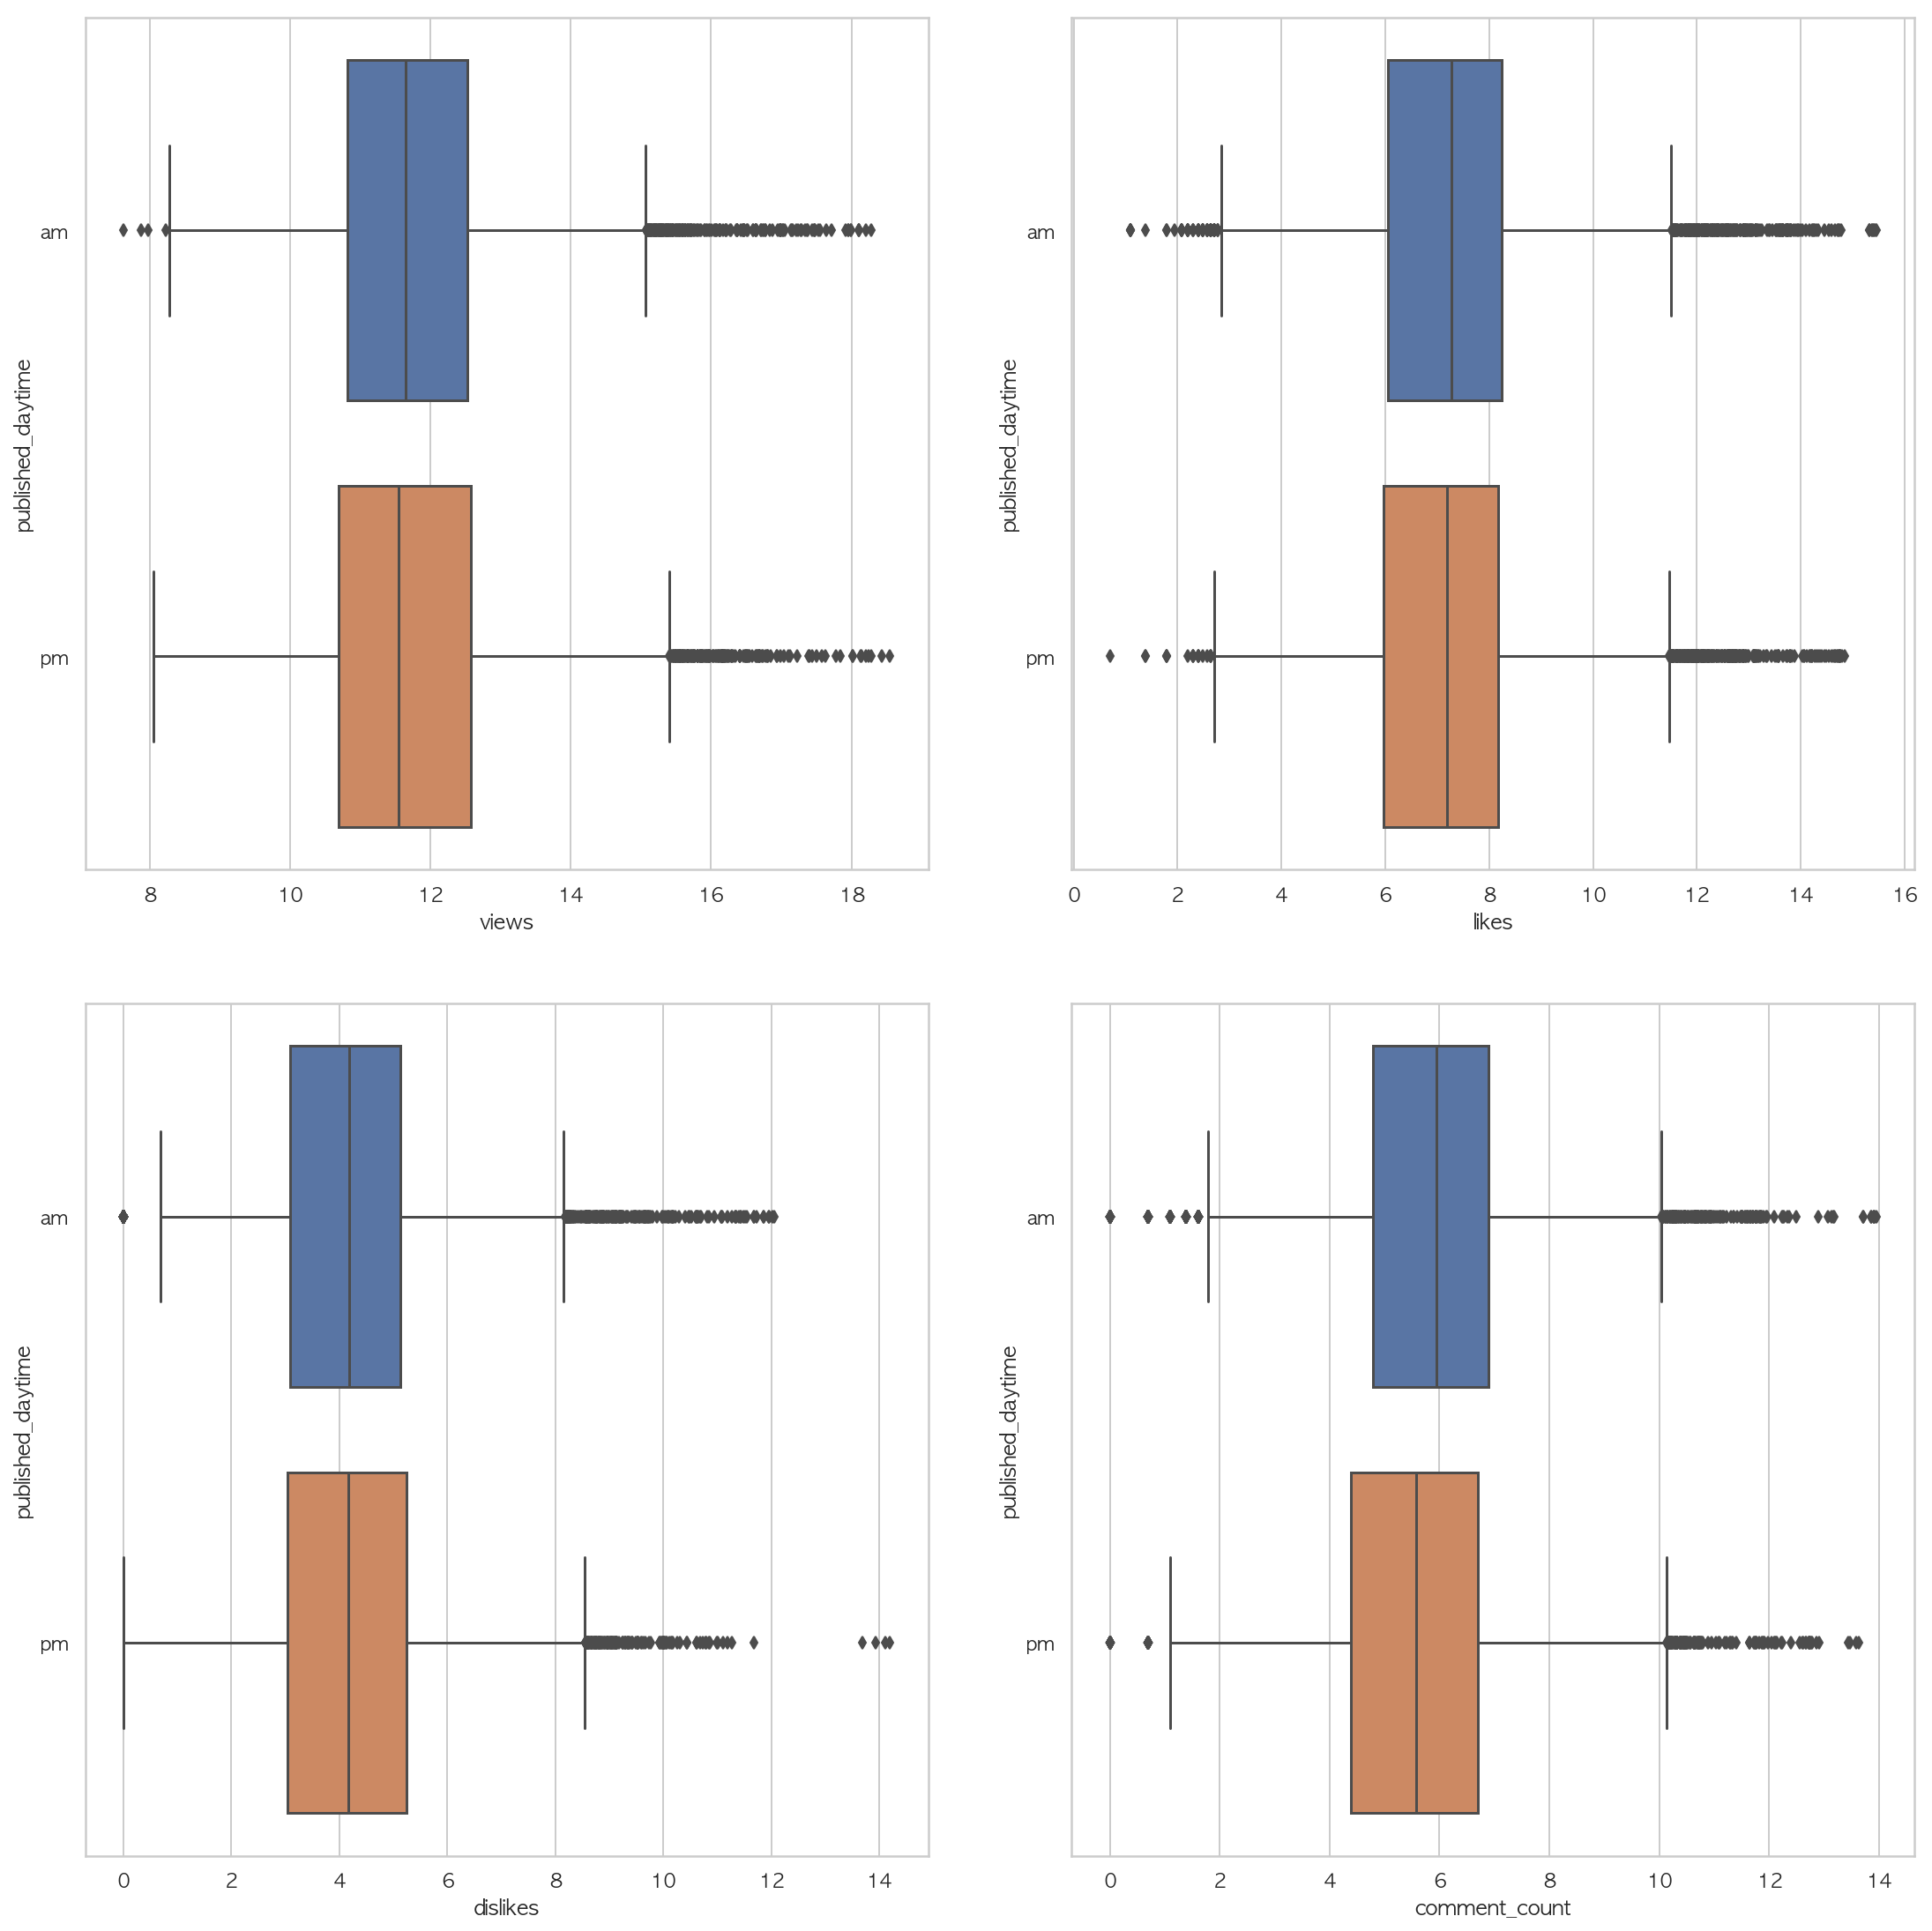

In [34]:
#
plt.figure(figsize=(16, 16))
plt.title("공개된 시간대에 따른 차이")
plt.subplot(2, 2, 1)
sns.boxplot(x=df.views.apply(np.log), y=df.published_daytime)
plt.subplot(2, 2, 2)
sns.boxplot(x=df.likes.apply(np.log), y=df.published_daytime)
plt.subplot(2, 2, 3)
sns.boxplot(x=df.dislikes.apply(np.log), y=df.published_daytime)
plt.subplot(2, 2, 4)
sns.boxplot(x=df.comment_count.apply(np.log), y=df.published_daytime)

plt.tight_layout()
plt.show()

[댓글 수를 기준으로 다시 쓰면]

$H_0 :$ mean(comment_count[time = am]) $=$  mean(comment_count[time = pm]) <br>
$H_1 :$ mean(comment_count[time = am]) $\neq$  mean(comment_count[time = pm]) 

In [35]:
print("오전 일 때의 평균", df.where(df.published_daytime == "day").dropna().comment_count.mean())
print("오후 일 때의 평균", df.where(df.published_daytime == "night").dropna().comment_count.mean())

오전 일 때의 평균 nan
오후 일 때의 평균 nan


In [36]:
sp.stats.ttest_ind(df.where(df.published_daytime == "am").dropna().comment_count,
                   df.where(df.published_daytime == "pm").dropna().comment_count, 
                   equal_var=False)

Ttest_indResult(statistic=-1.6406224845086634, pvalue=0.10088997771240996)

**Conclusion of 2.**

오후에 공개된 영상이 더 많은 댓글을 받다고 말하기는 힘들다. 다만...

유의수준은 분석가가 상황을 고려해 재량껏 정하는 것

이전에 언급했듯이 가설은 내가 이 데이터를 통해 주장하고 싶은 것이다. 이 주장은 행동이나 전략으로 이어질 수 있는 것이 좋다고 할 수 있다.

상황 : 유튜브 영상을 녹화하고 업로드를 하려한다. 제목은 어떻게 하면 좋을까? 

**가설  3. 제목에 쓰인 단어의 수는 조회수에 영향을 미친다.**

먼저, 제목의 길이는 어떤 분포인가?

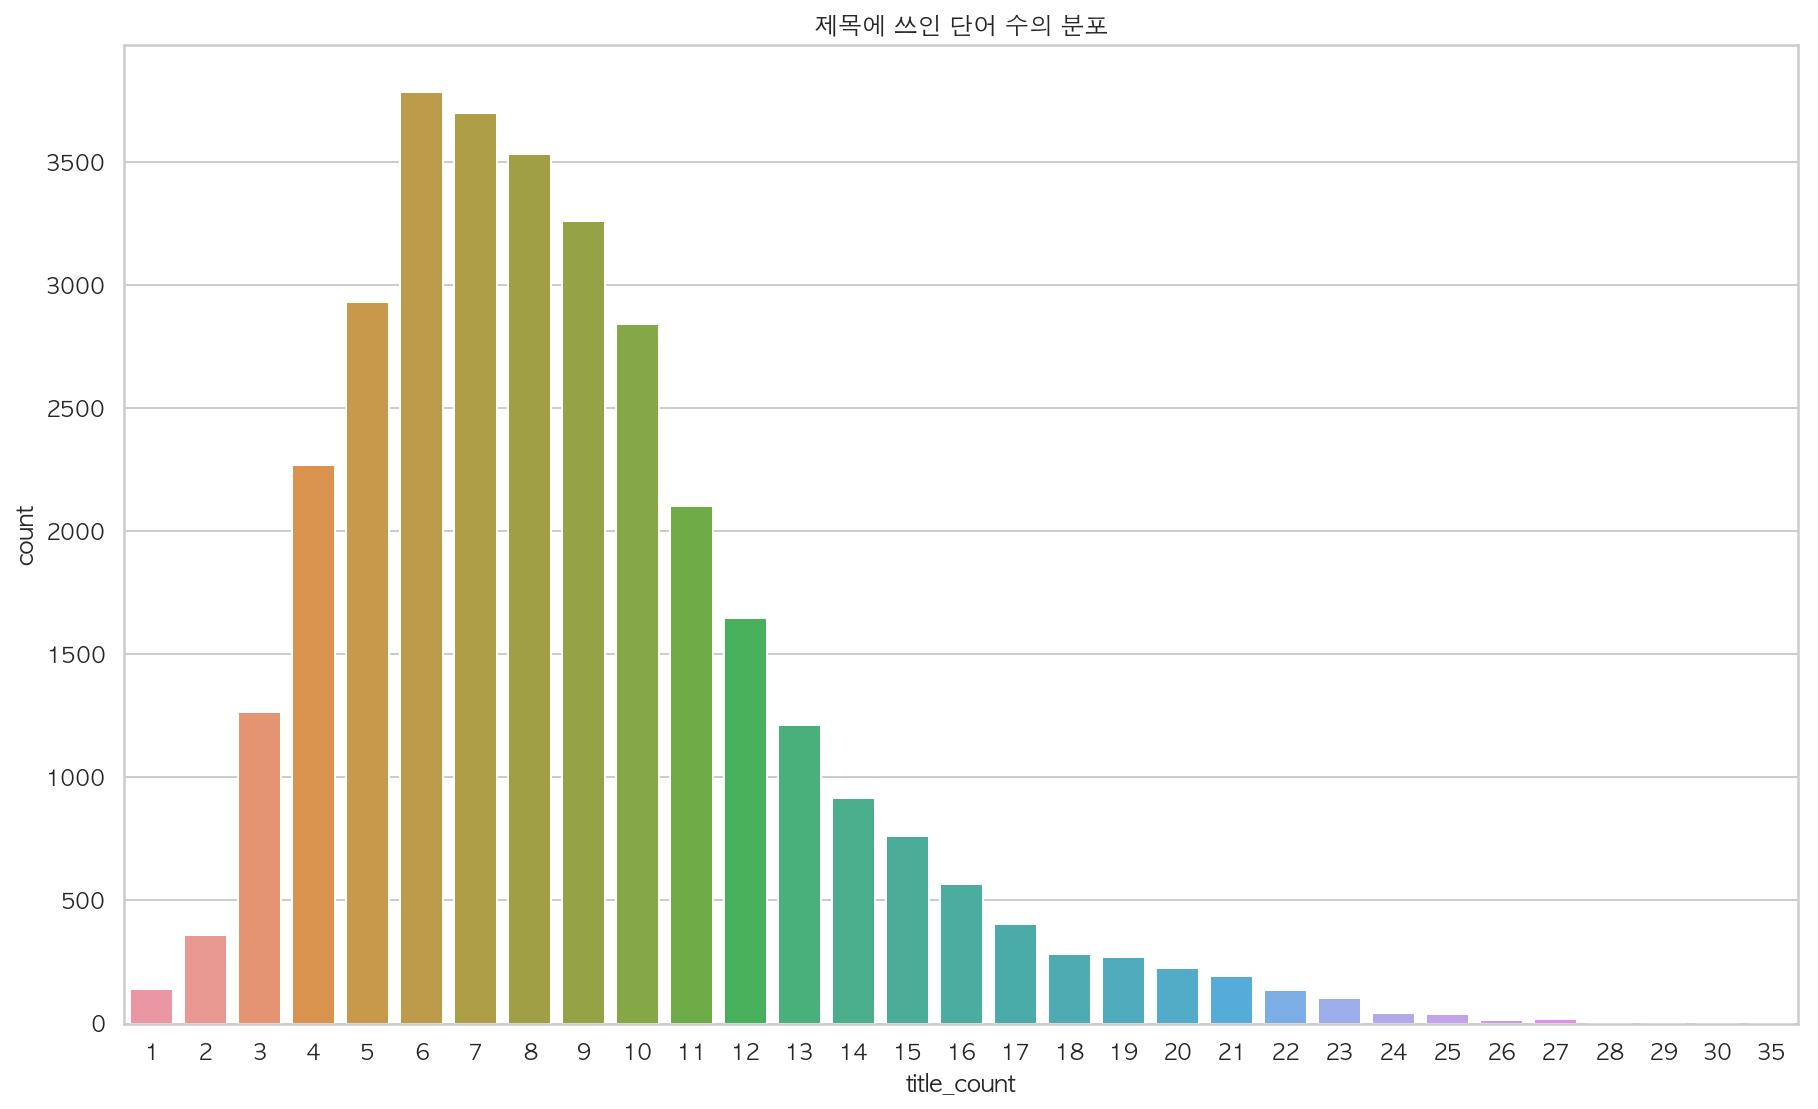

In [37]:
def getCount(s):
    s_ = s.split(" ")
    return len(s_)

df["title_count"] = df.title.apply(getCount)
plt.figure(figsize=(15, 9))
sns.countplot(df["title_count"])
plt.title("제목에 쓰인 단어 수의 분포")
plt.show()

**제목에 쓰인 단어 수와 조회수 간의 관계가 존재하는가?**

일단 그래프 먼저!

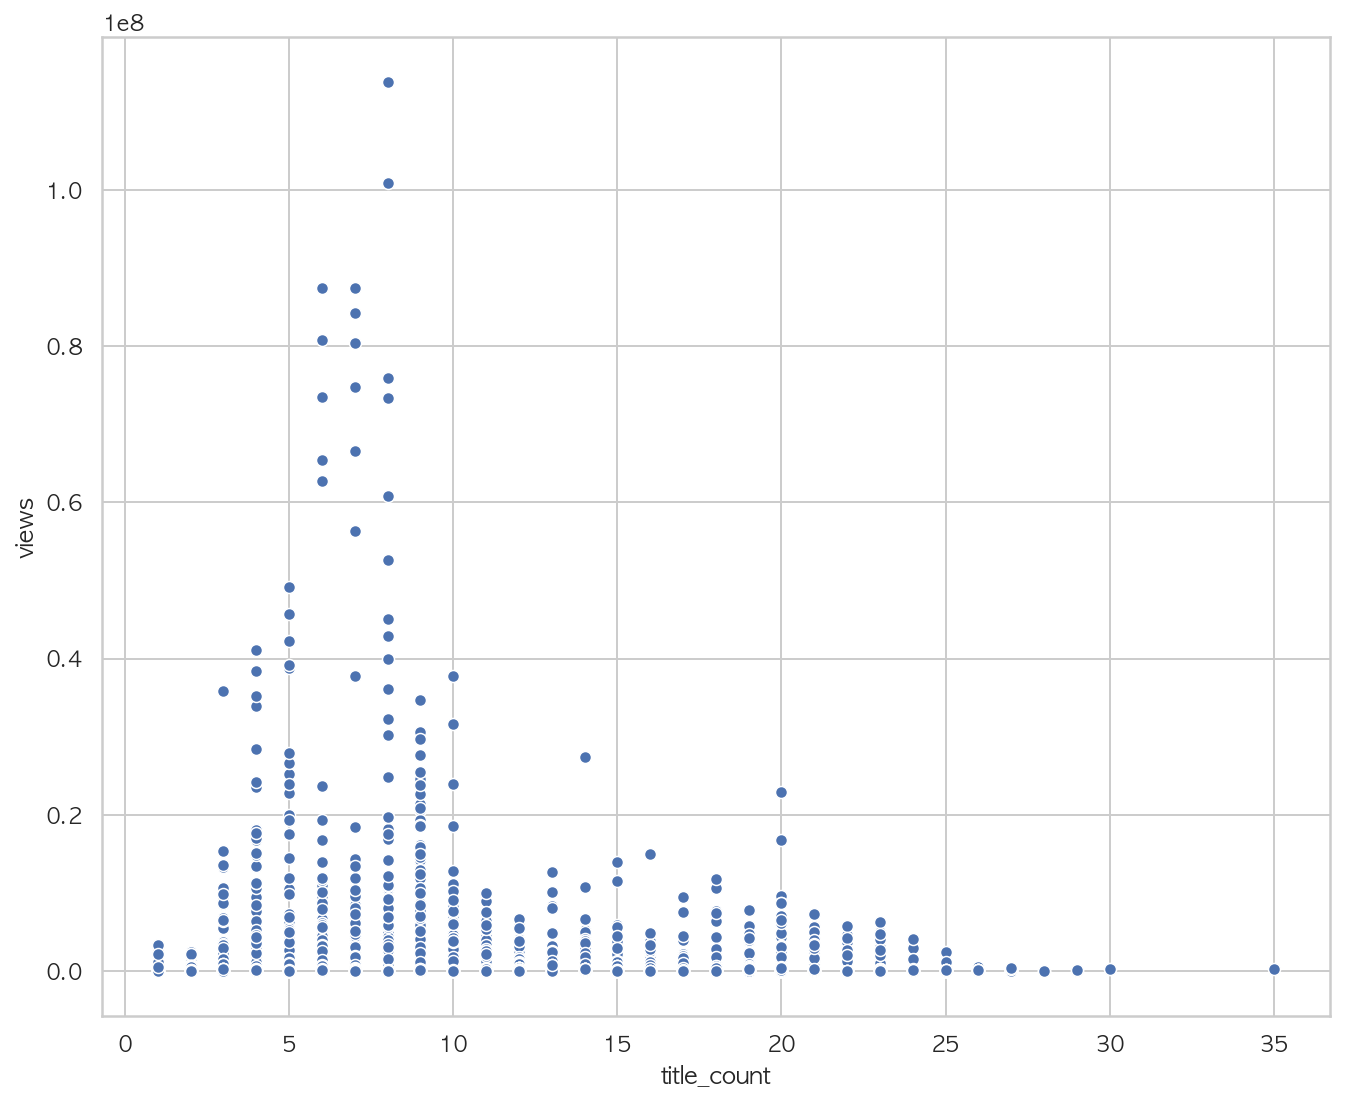

In [38]:
plt.figure(figsize=(11,9))
sns.scatterplot(x=df["title_count"], y=df.views)
plt.show()


이 때, 조회수는 1 ~ 35까지의 카테고리 데이터 또는 실수형 데이터로 취급 할 수 있겠지만, 1 ~ 35의 숫자에는 "순위"라는 것이 존재하기 때문에 범주형데이터와 같지 않고, 이산적인 분포이기 때문에 실수형 데이터와 같지 않다.

##### Kendall rank correlation coefficient 과 Spearman correlation

[wikipedia](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient)

In [39]:
sp.stats.pearsonr(df["title_count"], df.views)

(-0.012697352923070664, 0.021032640426089093)

In [40]:
sp.stats.kendalltau(df["title_count"], df.views)

KendalltauResult(correlation=-0.021402004264424915, pvalue=1.8992686544631418e-08)

In [41]:
sp.stats.spearmanr(df["title_count"], df.views)

SpearmanrResult(correlation=-0.02977720731809981, pvalue=6.226265596935524e-08)

In [42]:
model = sm.OLS.from_formula(
    "views ~ C(title_count) - 1", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.276
Date:                Wed, 22 May 2019   Prob (F-statistic):           8.36e-05
Time:                        21:38:51   Log-Likelihood:            -5.3234e+05
No. Observations:               33023   AIC:                         1.065e+06
Df Residuals:                   32992   BIC:                         1.065e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(title_count)[1]   2.983e+05   2.06

**Conclusion 3.**

**위의 결과를 보아하니 제목은 3 ~ 9개의 단어로 짓는게 좋을 것 같다.**

# 정리하자면, 데이터리포트 에는

 * **데이터의 출처를 분명히**
 * **데이터의 통계적 특성을 탐구하고**
 * **그 과정에서 시각화를 많이!(하나의 시각화는 하나의 의미를 담는다.)**
 * **그 과정에서 생긴 질문을 가설로**
 * **가설을 검정하고 결론을 쓴다.**

# 텍스트 분석

## NLTK
[Document](https://www.nltk.org/)

![](https://static1.squarespace.com/static/538cea80e4b00f1fad490c1b/54668a77e4b00fb778d22a34/54668d8ae4b00fb778d2859c/1416007413413/NLTK.png?format=1000w)

NLTK(Natural Language Toolkit) 패키지는 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지다. 다양한 기능 및 예제를 가지고 있으며 실무 및 연구에서도 많이 사용된다.

In [43]:
# 설치는 
#!pip install nltk 

# import는 이렇게 
import nltk

In [44]:
# 전체 제목을 하나의 문서로
title_bank = ""

for title in df.title:
    title_bank += " " + title
    
title_bank[:100]

' 좋아 by 민서_윤종신_좋니 답가 JSA 귀순 북한군 총격 부상 나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼) 이명박 출국 현장, 놓치면 안되는 장면 김장겸은 물러갔다'

In [45]:
import pickle
with open("stopwords.txt", "rb") as f:
    stopwords = pickle.load(f)
    
tokens = title_bank.split(" ")
useless = ["-", "", "|", "/", "]", "[", "]", "/", ":"]
tokens = [t for t in tokens if t not in stopwords + useless]
title_text = nltk.Text(tokens, name="youtube titles")

#서로 다른 단어의 갯수
print(len(set(title_text)))
title_text.vocab()

62073


FreqDist({'문재인': 790, '2018': 616, 'BTS': 565, '먹방': 523, 'vs': 520, '이유': 503, '김어준의': 465, '2018년': 441, '생방송': 413, '대통령': 402, ...})

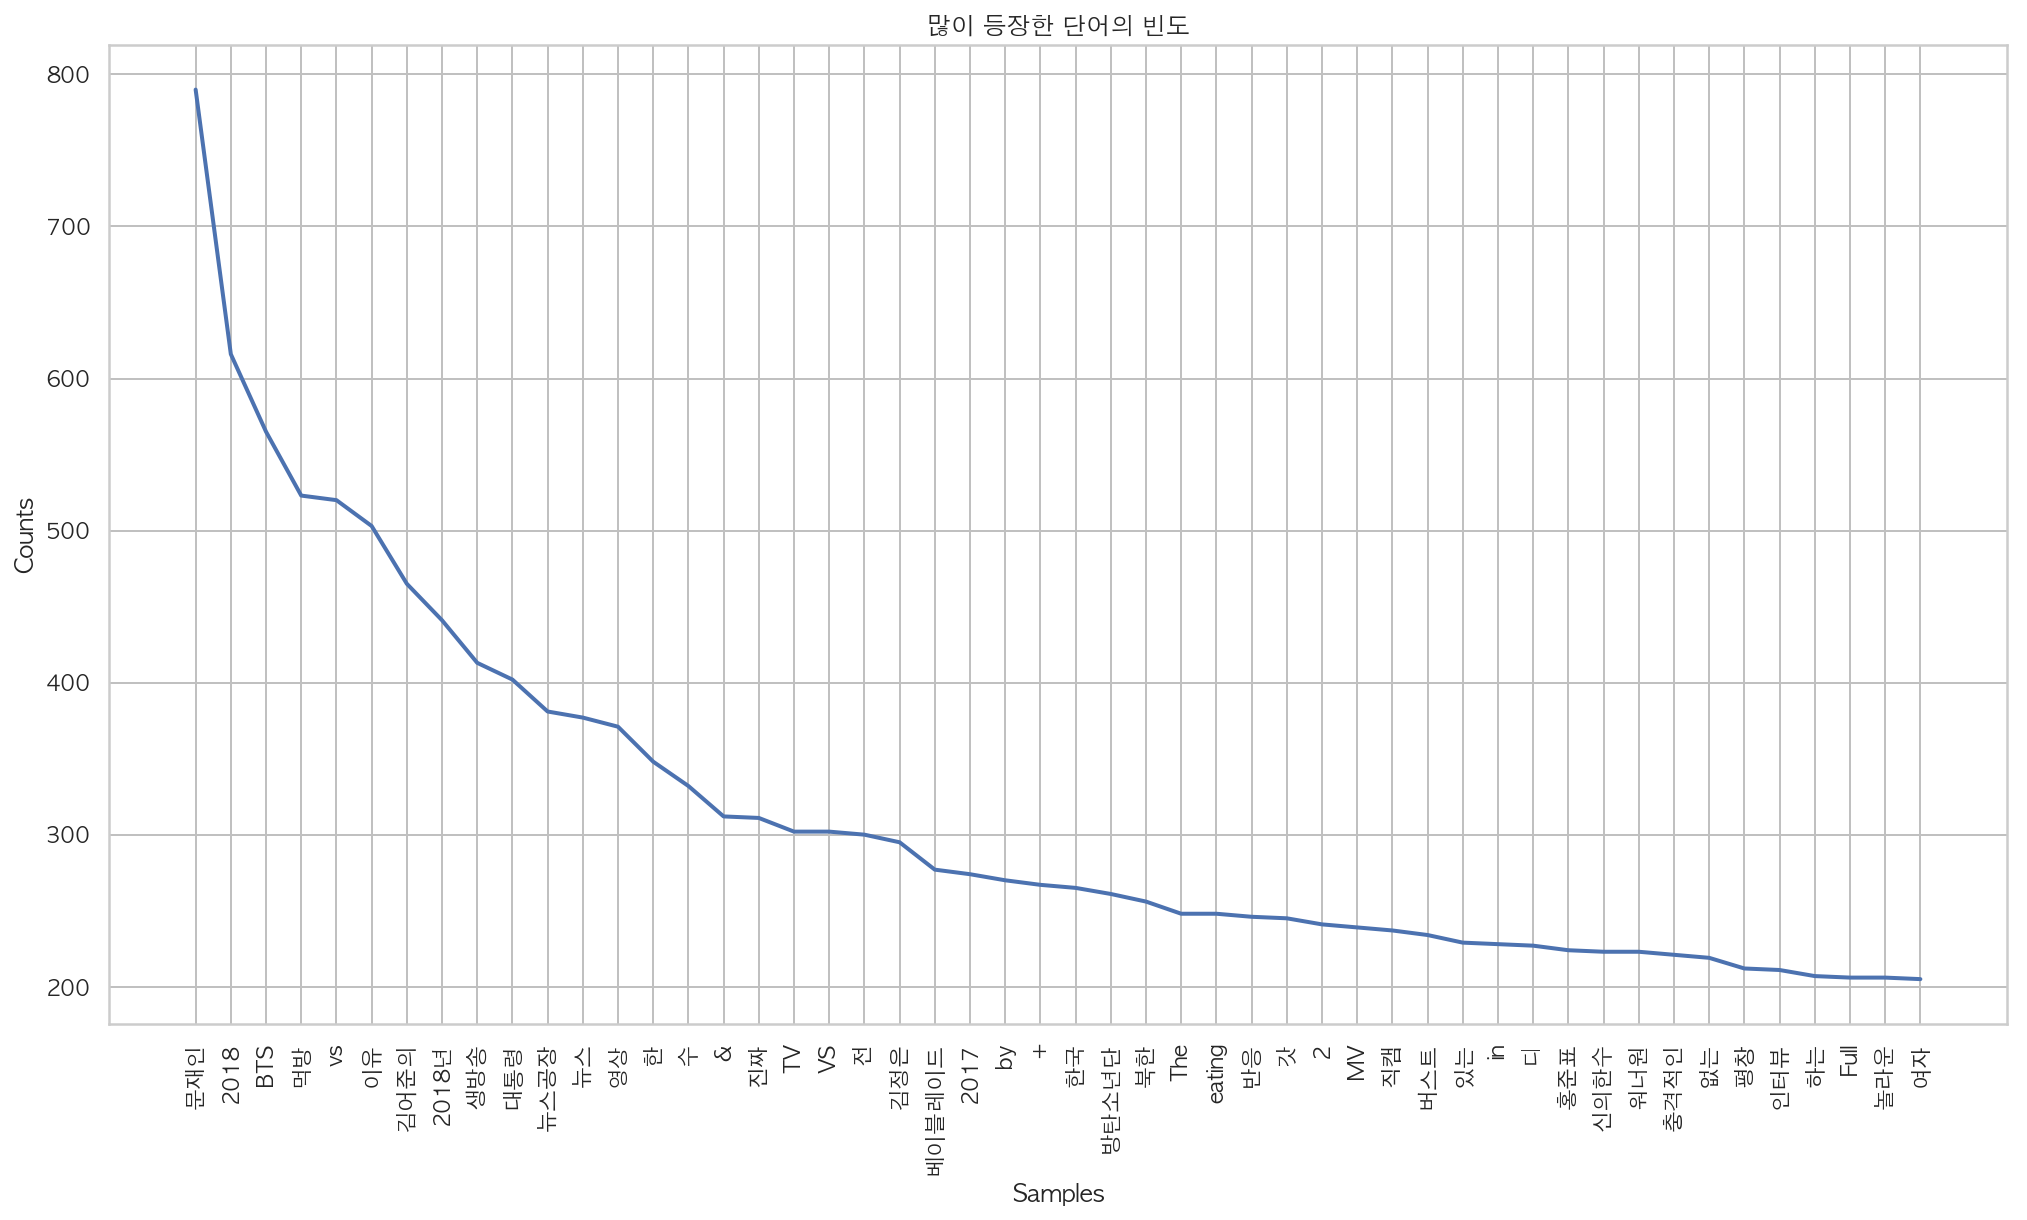

In [46]:
plt.figure(figsize=(17,9))
plt.title("많이 등장한 단어의 빈도")
title_text.plot(50, )
plt.show()

In [47]:
title_text.similar("BTS")

behind show on and at 반응 move drop live won reaction trailer mic takes
burn 좋은 world 웃음참기 release fake


In [48]:
title_text.collocations()

김어준의 뉴스공장; 베이블레이드 버스트; 신의한수 생방송; Deweni Inima; [변희재의 시사폭격]; BTS
(방탄소년단); Inima Episode; Tasty Guys]; [맛있는 녀석들; eating show; [법륜스님의
즉문즉설; 녀석들 Tasty; Wanna One; 문재인 대통령; 공대생 변승주; Mukbang eating; 묻어버린
'거짓의; 뉴스룸 다시보기; 대통령을 묻어버린; 생방송 PenN


# 워드클라우드 

빈도나 중요도를 기준으로 글자의 크기를 결정하여 시각화하는 것으로 텍스트 시각화에서 가장 유명한 것. 

패키지 설치 : `pip install wordcloud`

In [49]:
# 설치는 pip install wordcloud

from wordcloud import WordCloud

In [50]:
font_path = "/Library/Fonts/AppleGothic.ttf" # 각자 폰트로 바꿔야 동작합니다. 

wc = WordCloud(max_words=2000, 
               font_path=font_path, 
               width=800, height=400,
               stopwords=stopwords + useless
              , background_color="white").generate_from_text(title_bank)

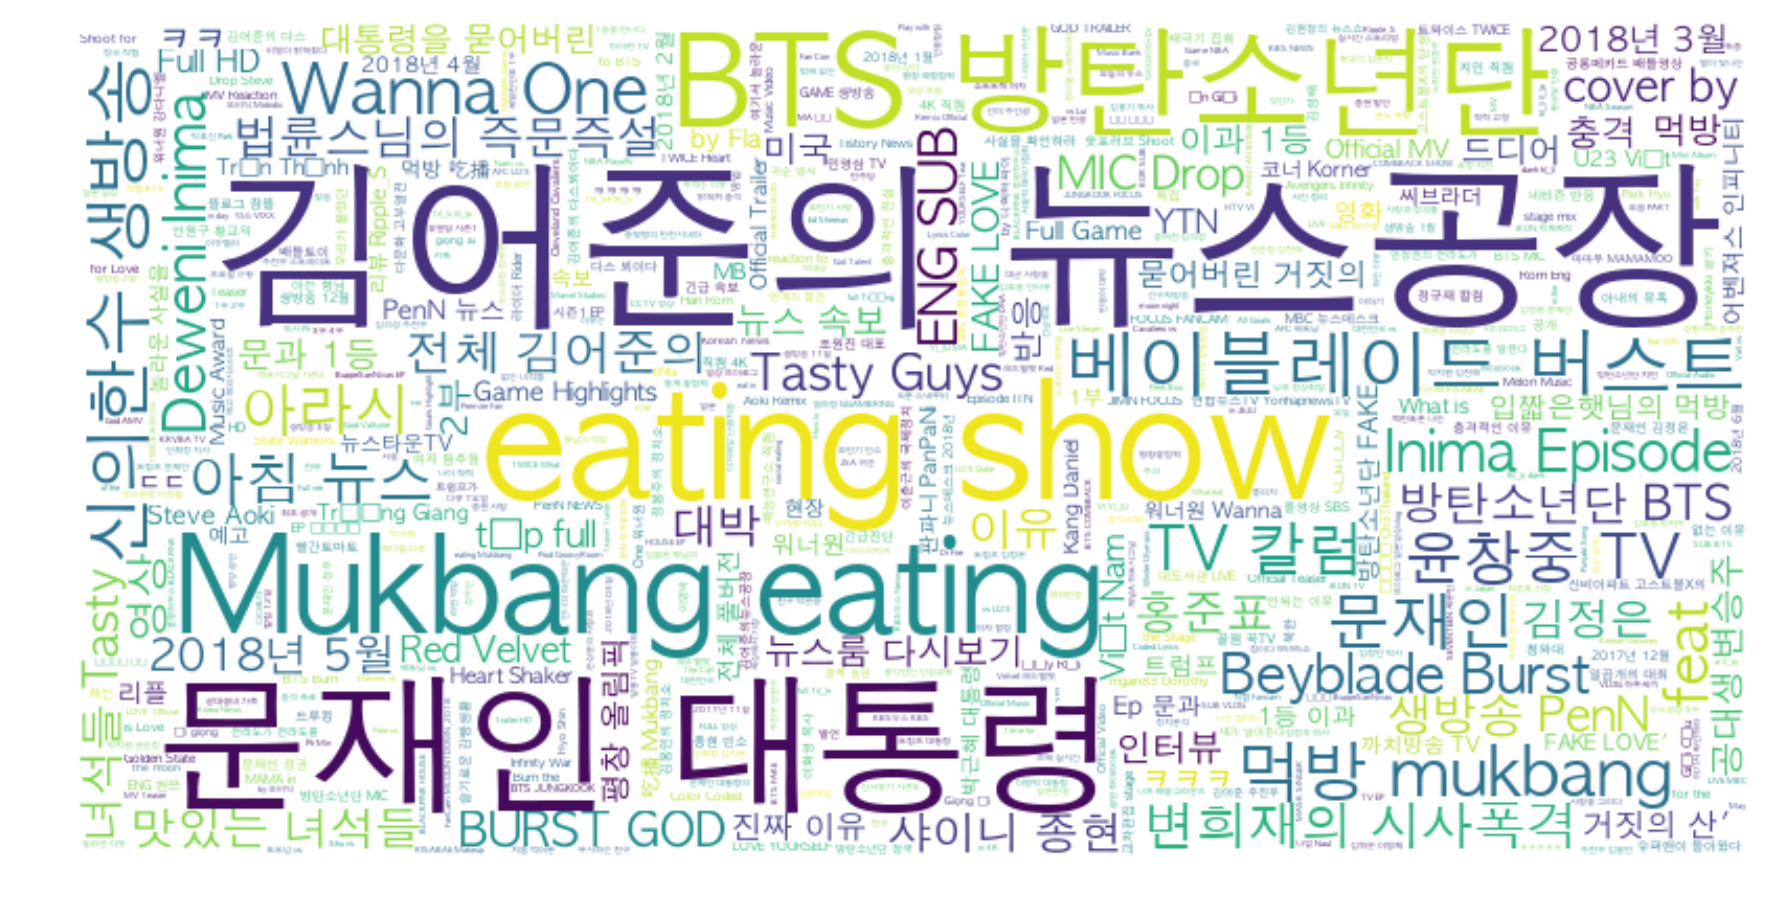

In [51]:
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

텍스트를 컴퓨터에서 처리하기 위해서는 이를 숫자로 변환해야한다. 오늘은 그 중 가장 기초적이지만 가장 중요한 BoW(Bag of Words)방식에 대해서 공부한다. 

# Bag of Words

: 간단하다. 단어장을 구성하고 해당 문서에 해당 단어가 나올 때마다 1씩 증가하는 것이다. 
```
ex>

문서 : 나는 오늘도 집에서 밥을 먹었다. 밥을 먹고나니 잠이 쏟아지네...

단어장 : {오늘, 집, 밥}

encoding : {1, 1, 2}
```

## 목표 : 조회수 상위 5%의 영상의 Description에서 더 많이 사용된 단어를 찾아보자!

In [52]:
top5 = df[["views", "description"]].where(df.views > df.views.quantile(0.95)).dropna()
top5.sort_values(by='views').tail()


views                                        description
3681    84281319.0  There was an idea… Avengers: Infinity War. In ...
29333   87430865.0  BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
3949    87450245.0  There was an idea… Avengers: Infinity War. In ...
4583   100911567.0  YouTube Rewind 2017. Celebrating the videos, p...
4742   113876217.0  YouTube Rewind 2017. Celebrating the videos, p...

In [53]:
under95 = df[["views", "description"]].where(df.views < df.views.quantile(0.5)).dropna()
under95.sort_values(by='views').tail()

views                                        description
8757   111158.0  여기는 영화의 미학을 재미로 풀어내는 곳, 김시선 영화채널입니다. 오늘은 그냥 가볍...
7322   111165.0  대신토론 2회가 드디어 나왔습니다. 많은 사랑과 관심 부탁드립니다.\n\n채널 구독...
31508  111174.0  대익 어린이에 대해 더 알고 싶다면페이스북 계정 - https://www.faceb...
21790  111179.0  Filmed&Edited by Leean\nleeanfilm@gmail.com\nh...
1777   111185.0  입국심사때 말실수로 인해서 입국거부당하지 않도록 주의해야 한다고 합니다. 특히 미국...

In [61]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_df=0.95, min_df=0.001, stop_words=nltk.corpus.stopwords.words())
vect.fit(df.description.dropna())
print(len(vect.vocabulary_))
list(vect.vocabulary_.items())[:10]

6574


[('윤종신', 5255),
 ('좋아', 5764),
 ('최초', 5996),
 ('공개', 2798),
 ('n그', 1548),
 ('이야기를', 5359),
 ('지금', 5839),
 ('만나보세요', 3649),
 ('좋은', 5774),
 ('보내는', 4096)]

In [62]:
top5_bow = vect.transform(top5.description).toarray().sum(axis=0)

In [63]:
under95_bow = vect.transform(under95.description).toarray().sum(axis=0)

In [64]:
top5_bow = top5_bow / np.linalg.norm(top5_bow)
under95_bow = under95_bow / np.linalg.norm(under95_bow)

In [65]:
top5_prefered = (top5_bow + 1) / (under95_bow + 1)

In [66]:
top5_prefer_dict = {k1:v for (k1, k2), v in zip(sorted(vect.vocabulary_.items(), 
                                                       key=lambda x : x[-1]), top5_prefered)}

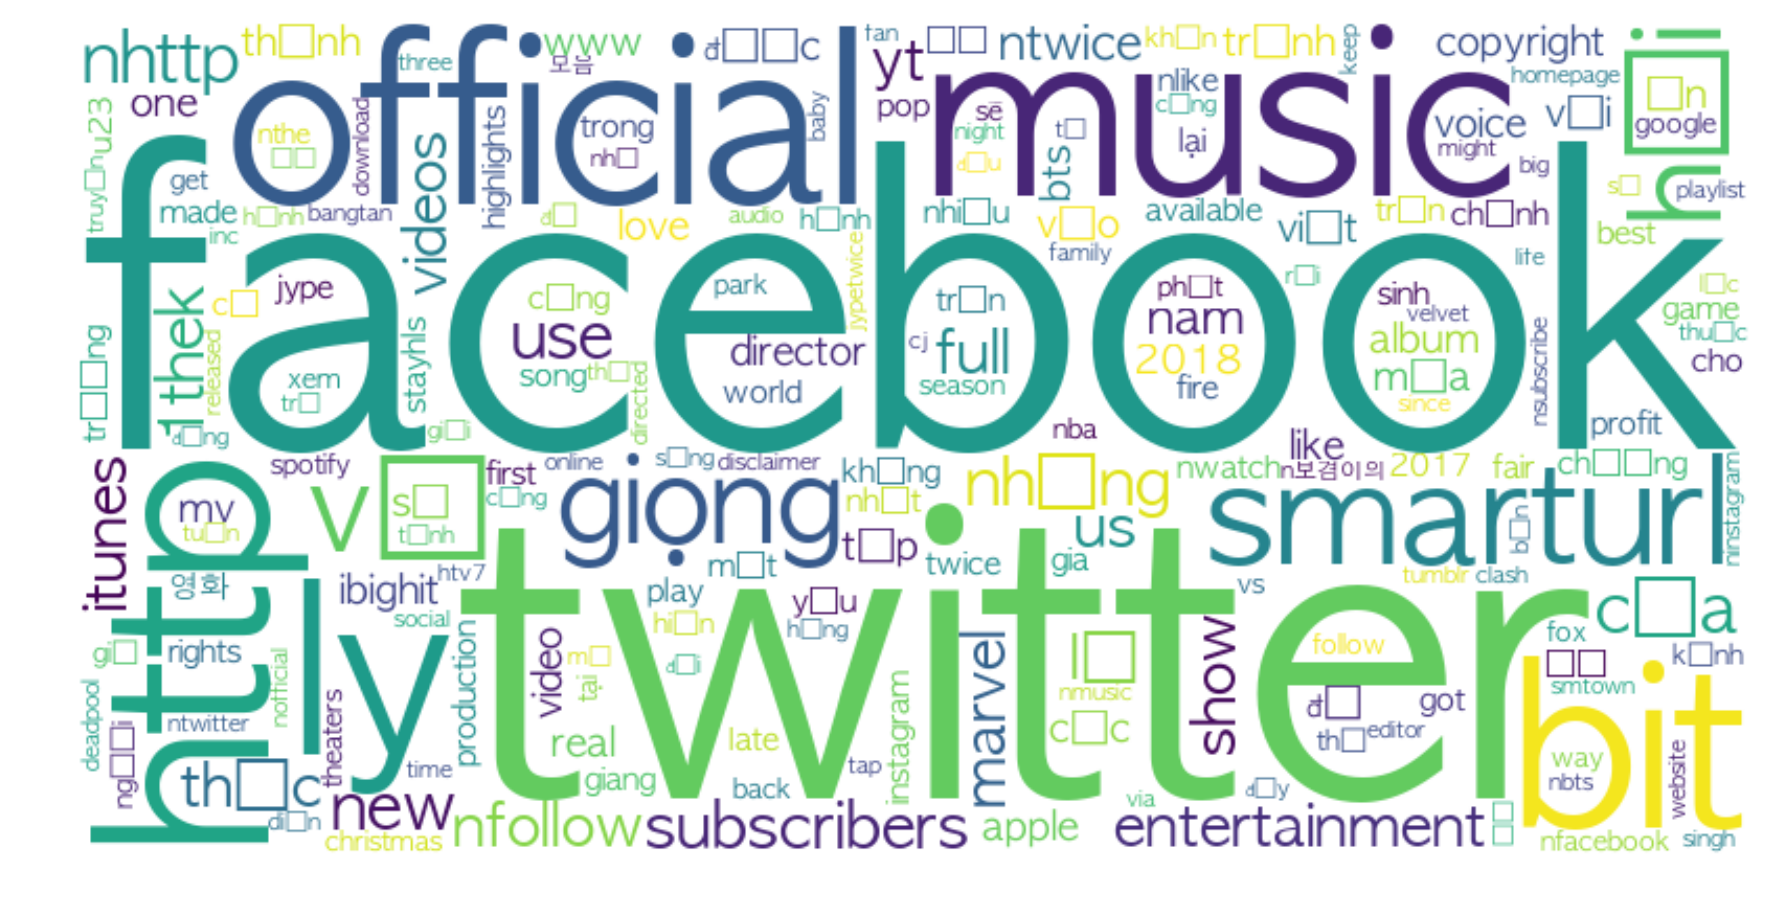

In [67]:
wc2 = WordCloud(font_path=font_path, 
               width=800, height=400, 
               background_color="white").generate_from_frequencies(top5_prefer_dict)

plt.figure(figsize=(15,15))
plt.imshow(wc2, interpolation="bilinear")
plt.axis('off')
plt.show()